# Europe Women's Datathon Spring 2025

In [1]:
# prompt: link to google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install plotly

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from IPython.display import display
import plotly.express as px
import numpy as np
import altair as alt

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 0. Visualization of Datasets

### 1. all_commodities.csv

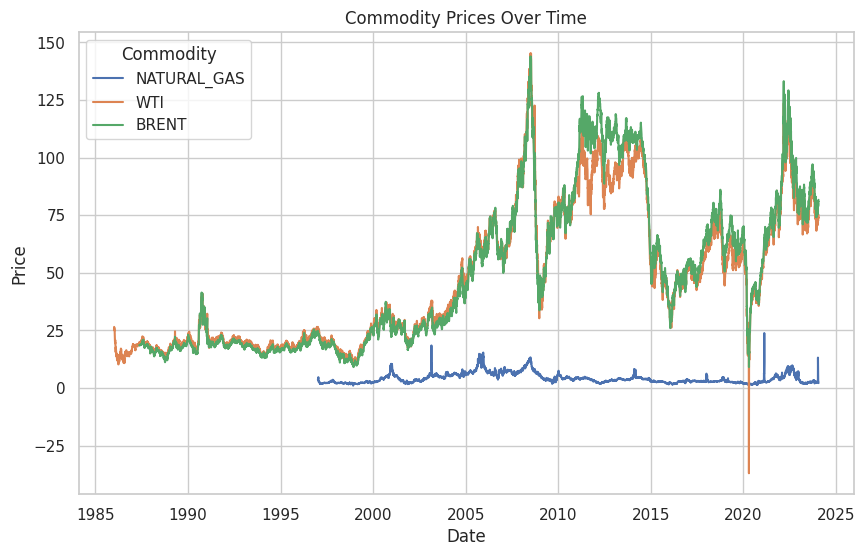

In [ ]:
commodities = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/all_commodities.csv', parse_dates=['Date_Time'])

sns.lineplot(data=commodities, x='Date_Time', y='Value', hue='Commodity_Simple')
plt.title('Commodity Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Commodity')
plt.show()

### 2. all_stocks_and_etfs.csv

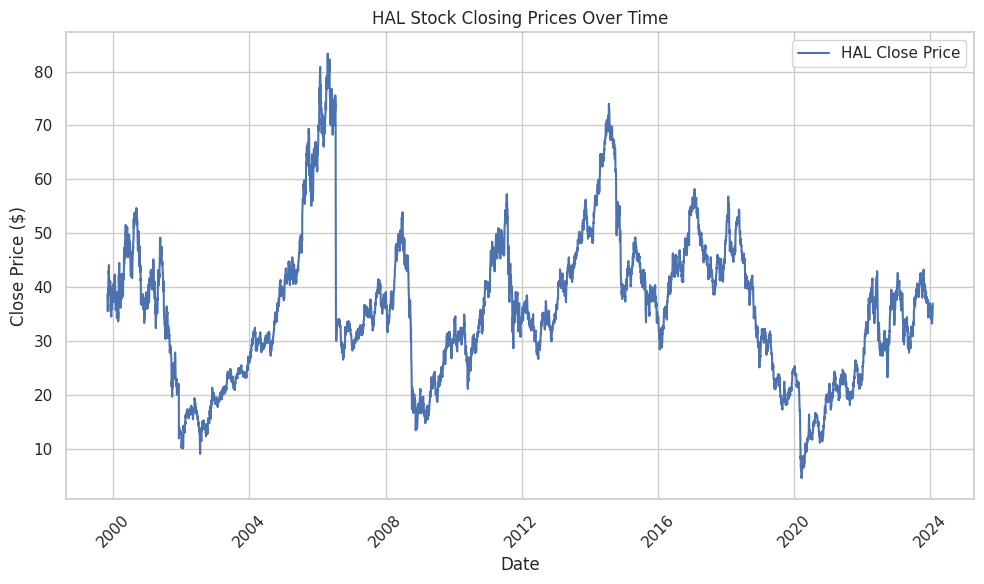

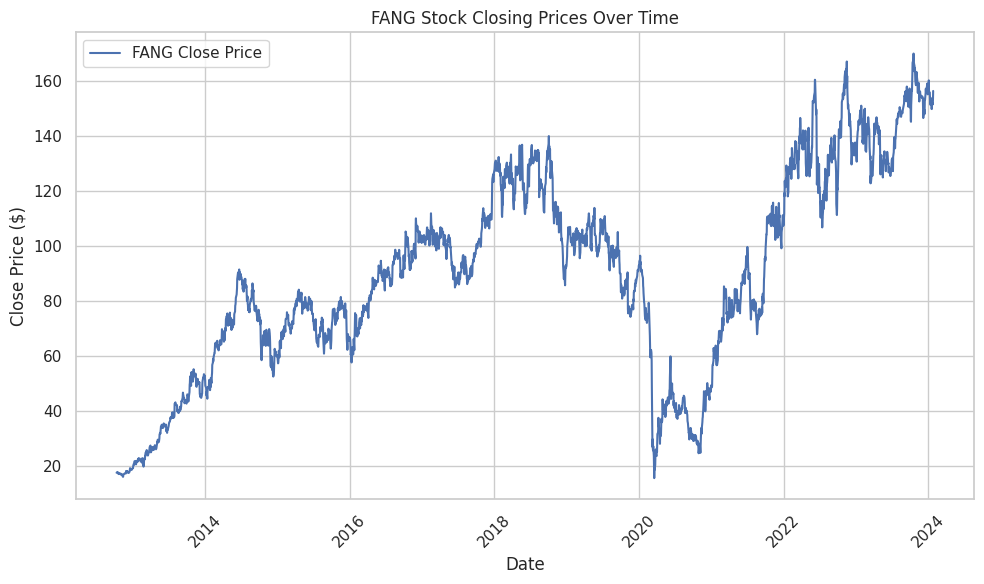

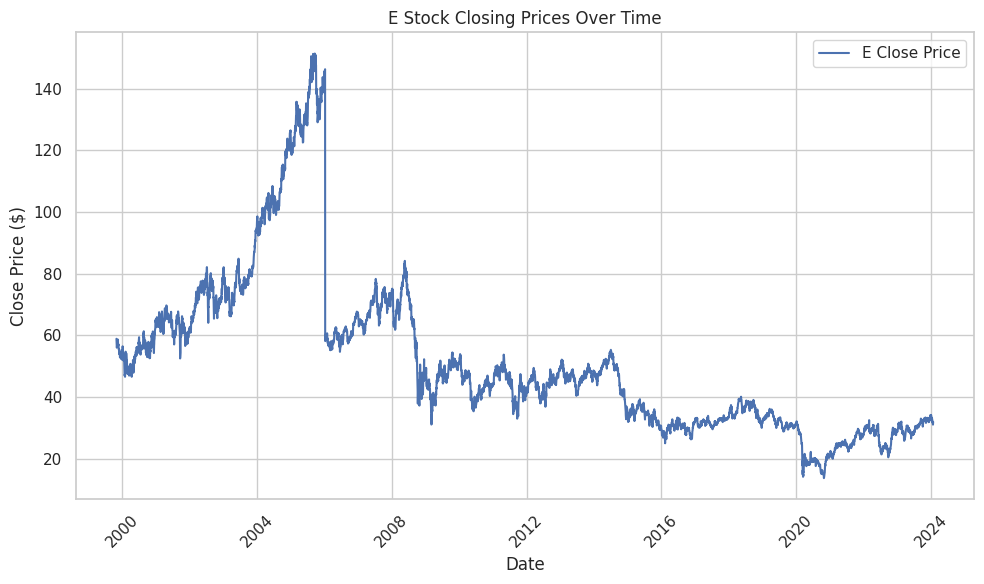

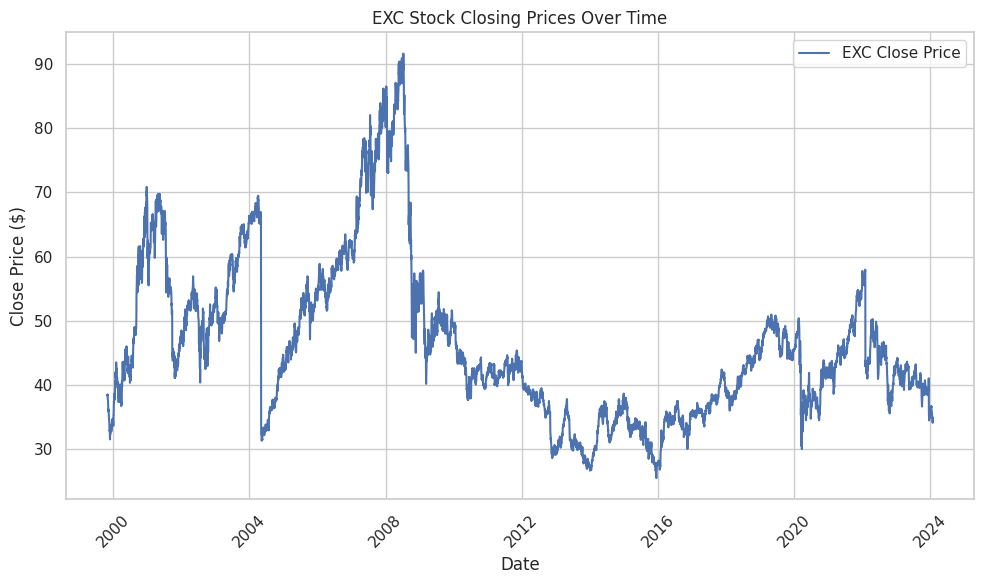

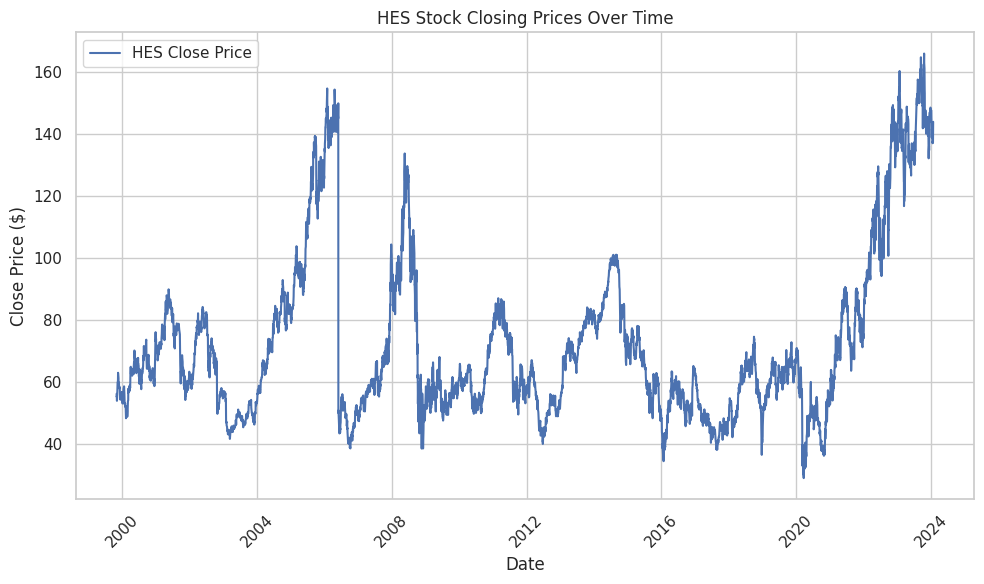

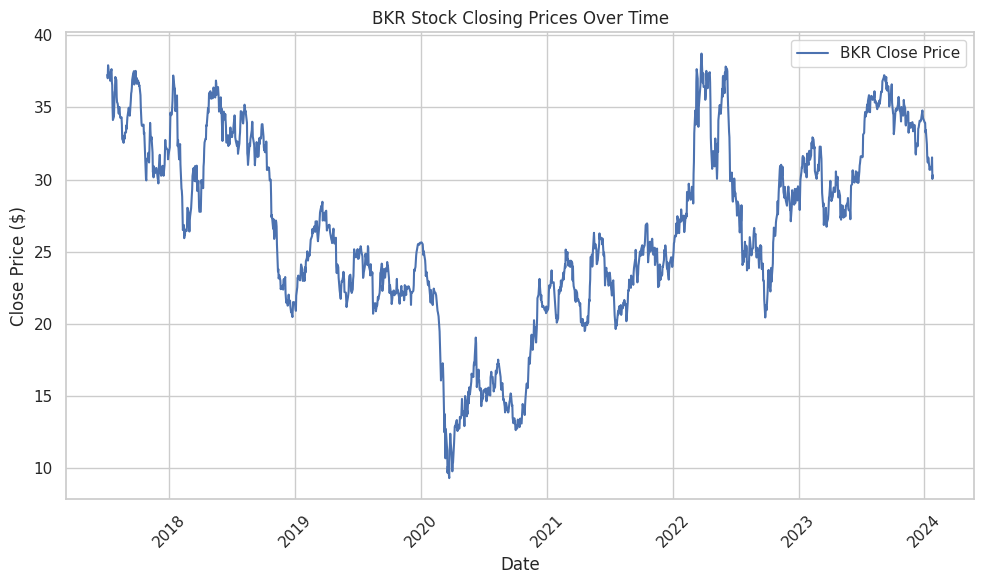

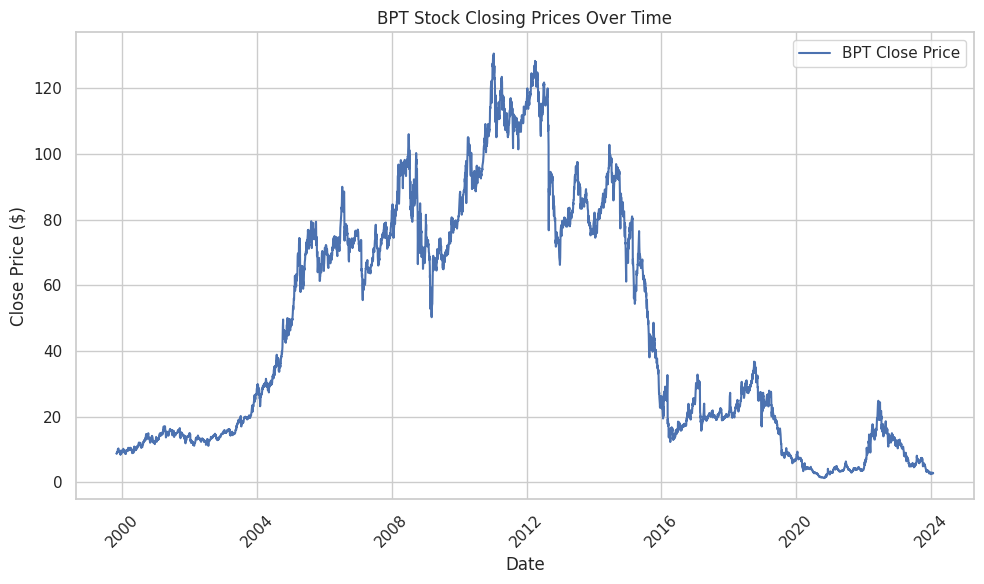

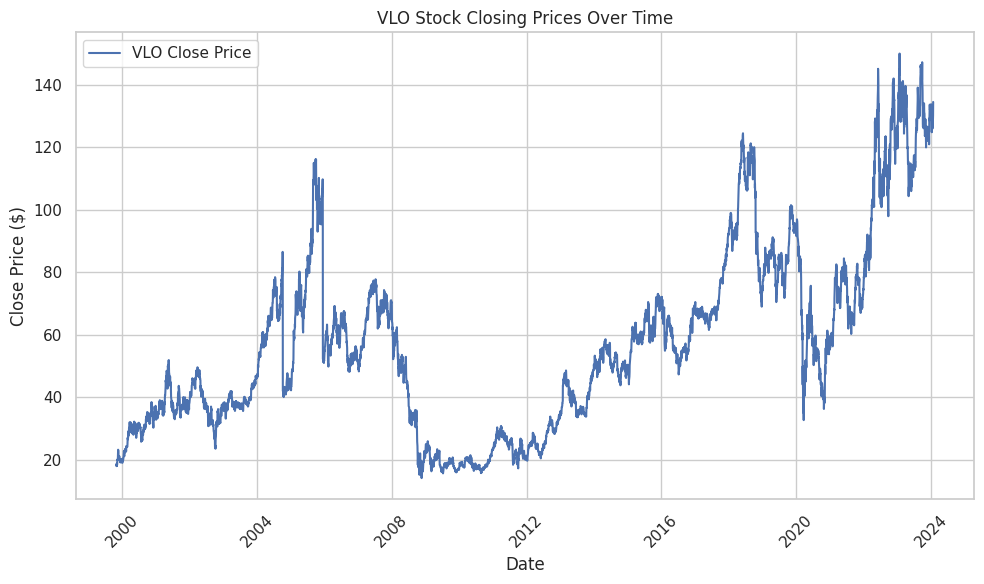

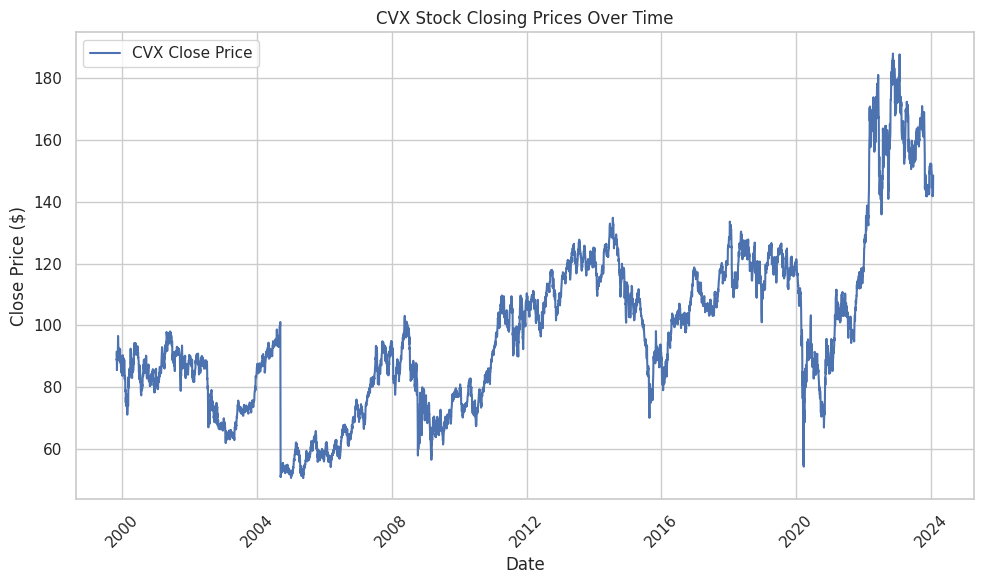

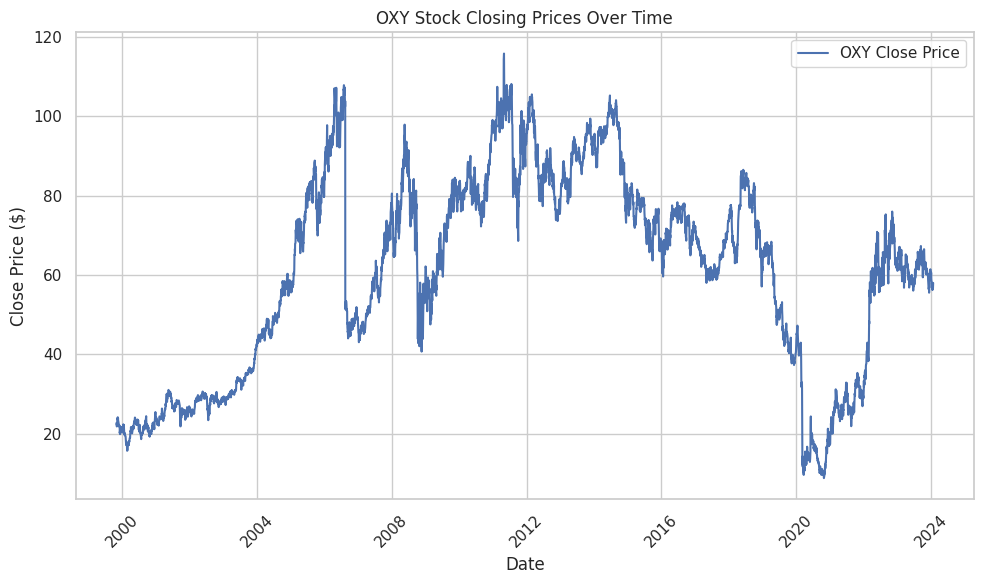

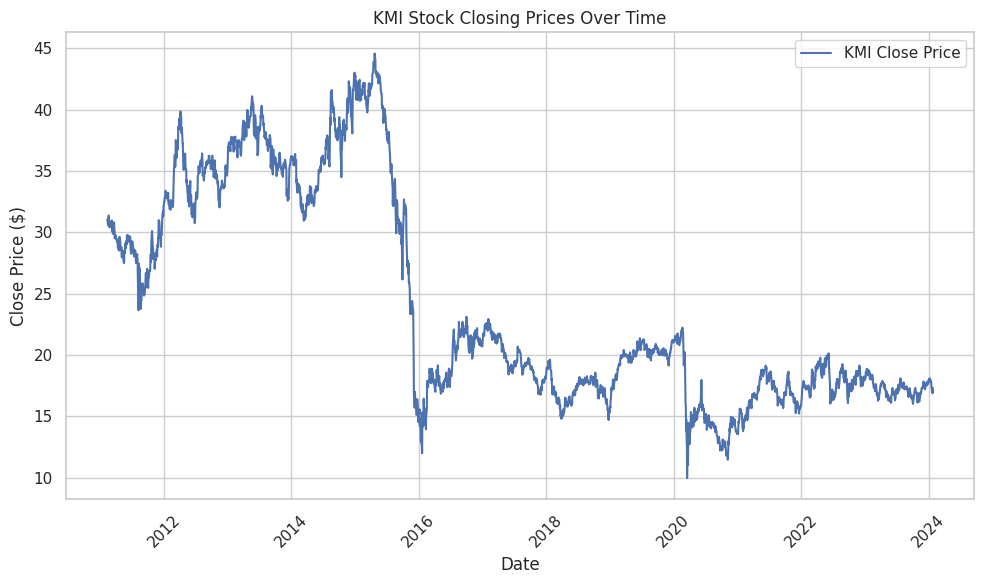

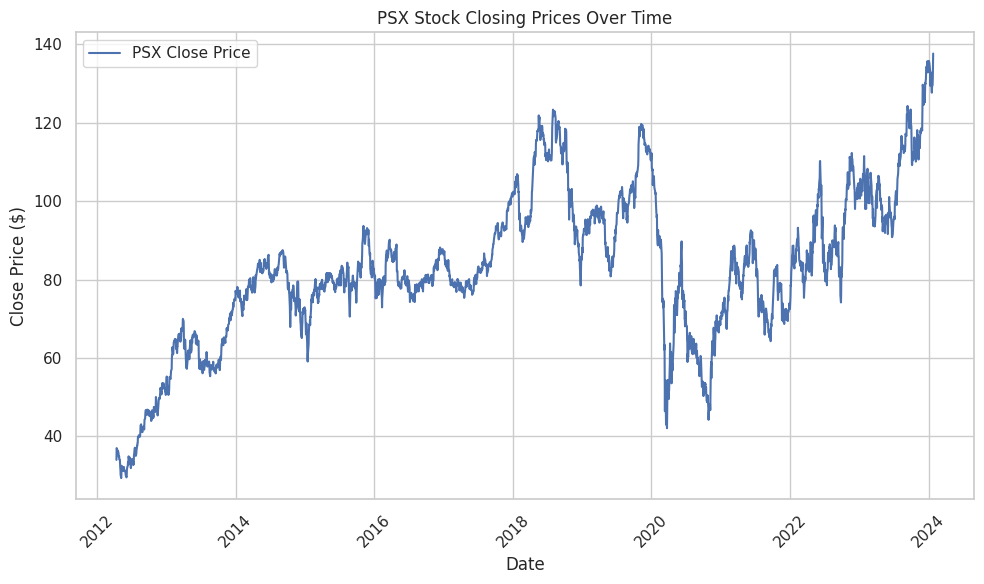

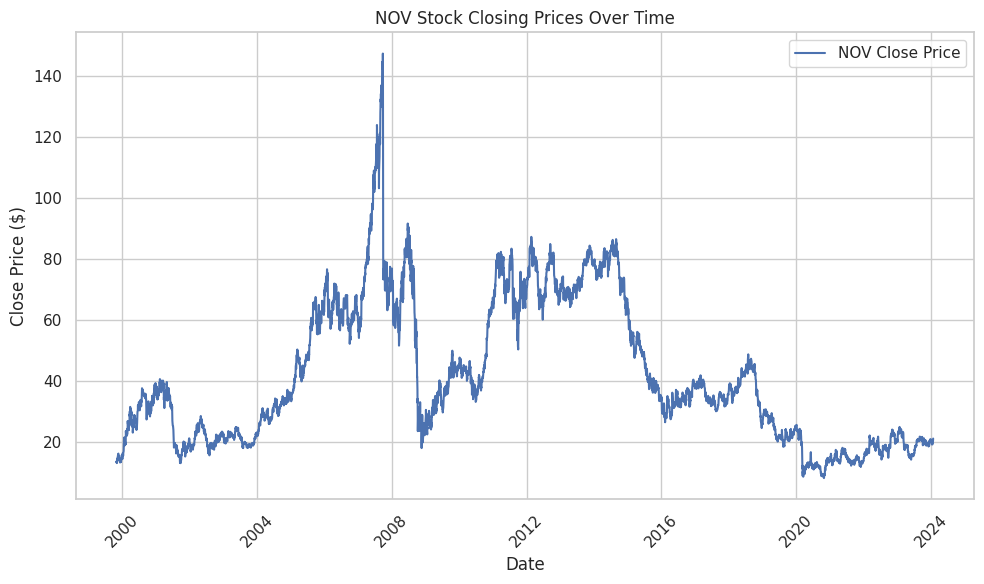

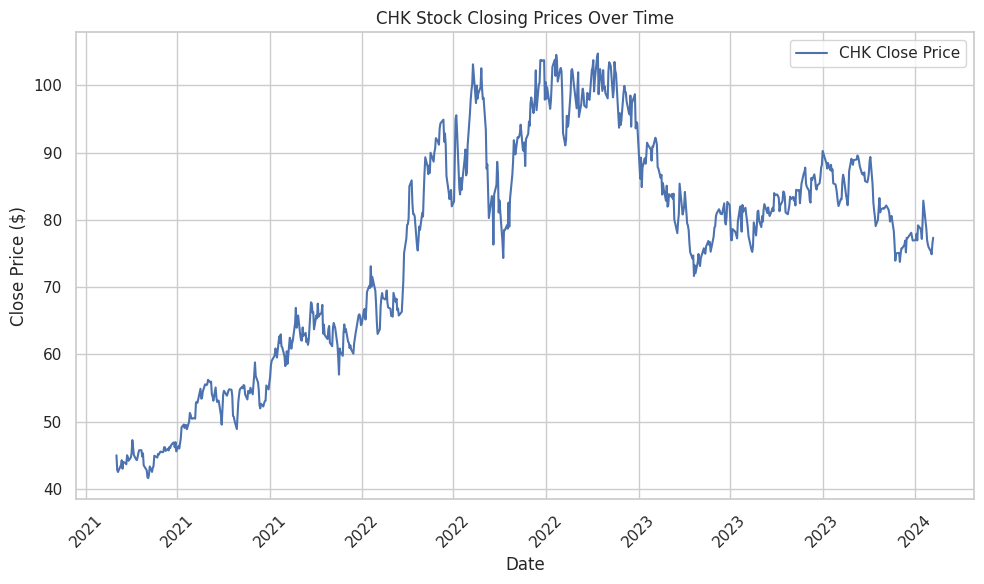

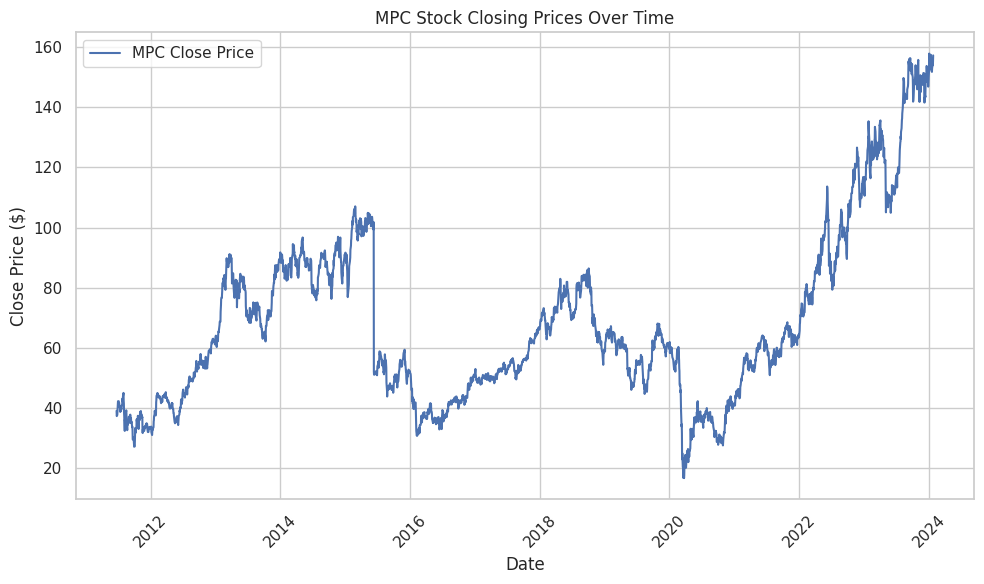

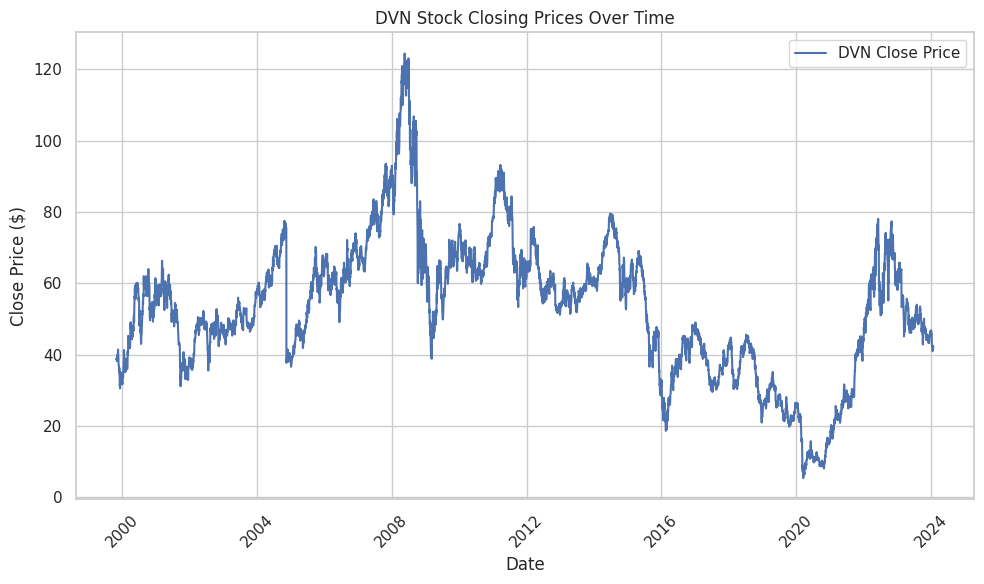

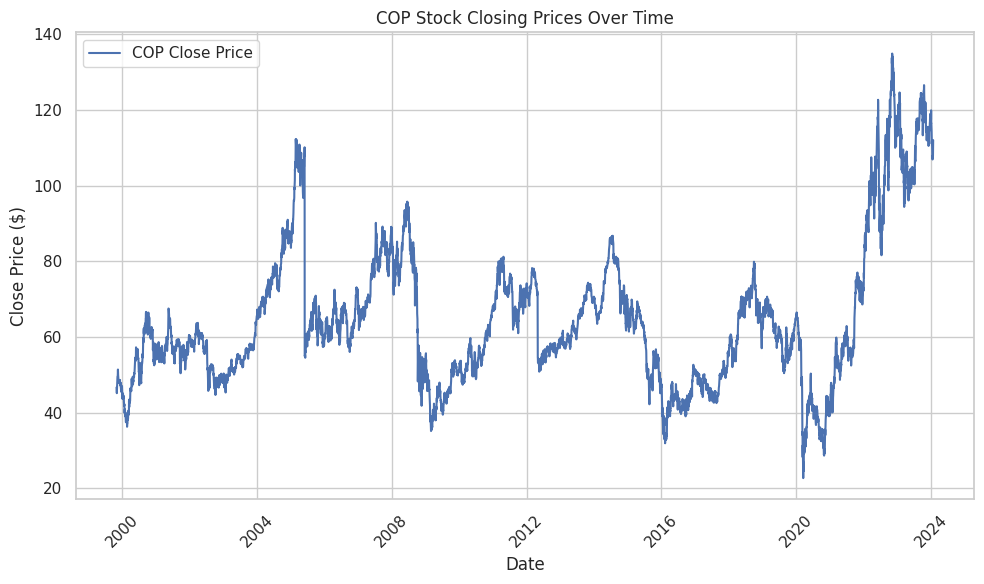

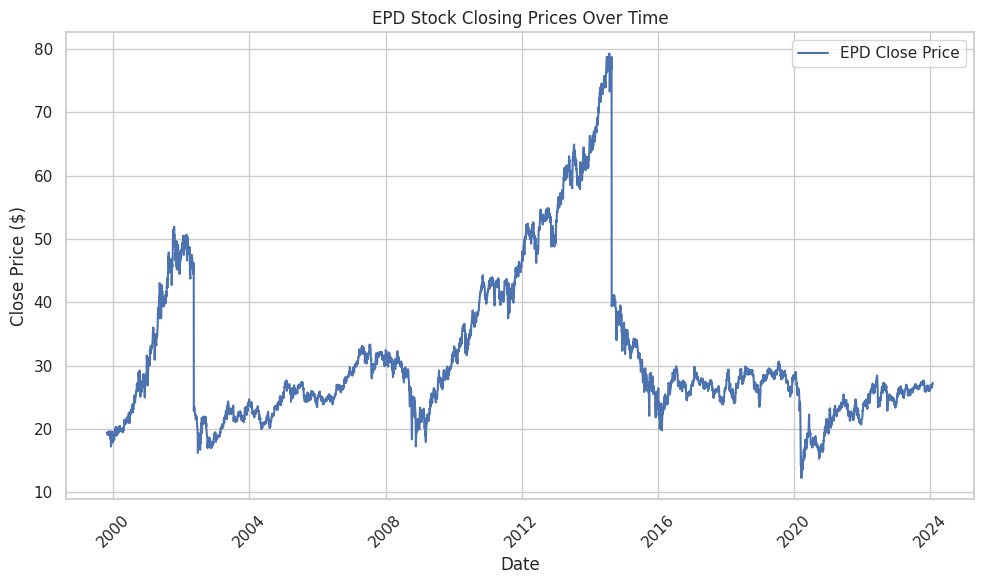

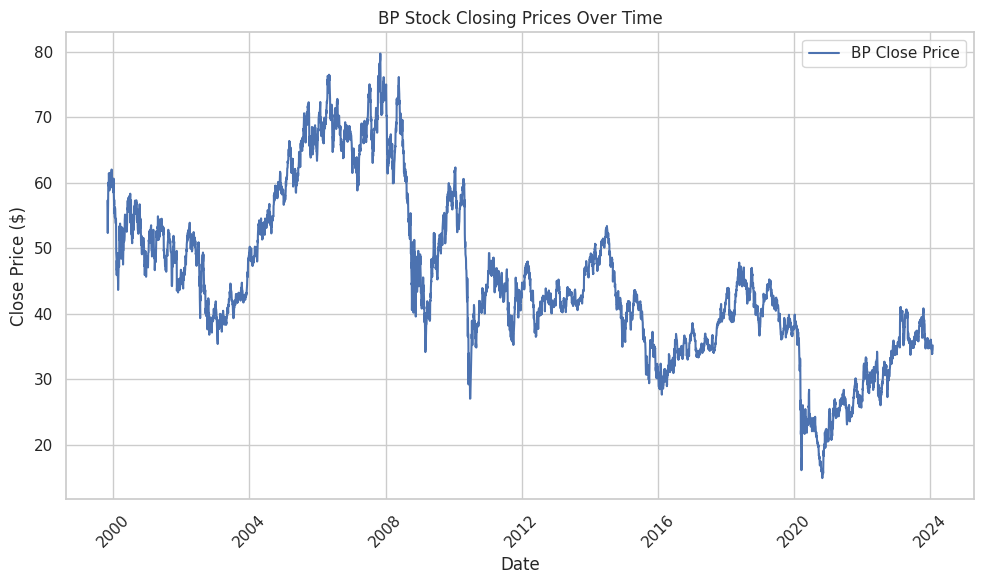

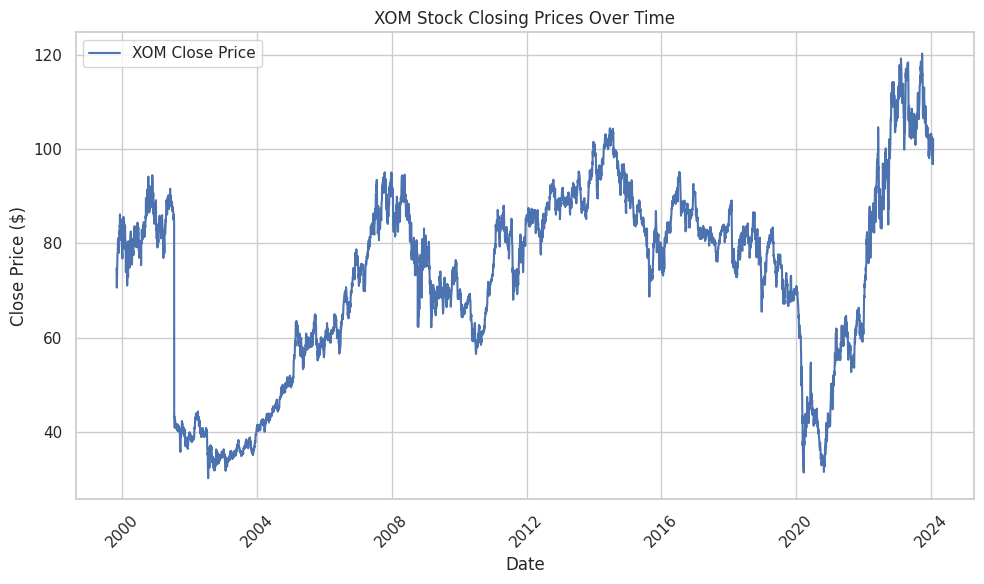

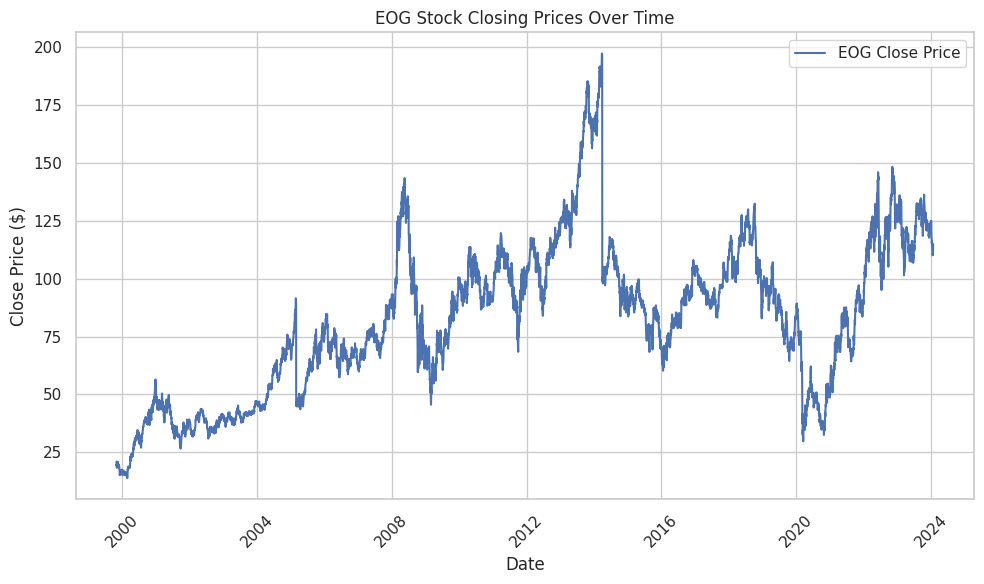

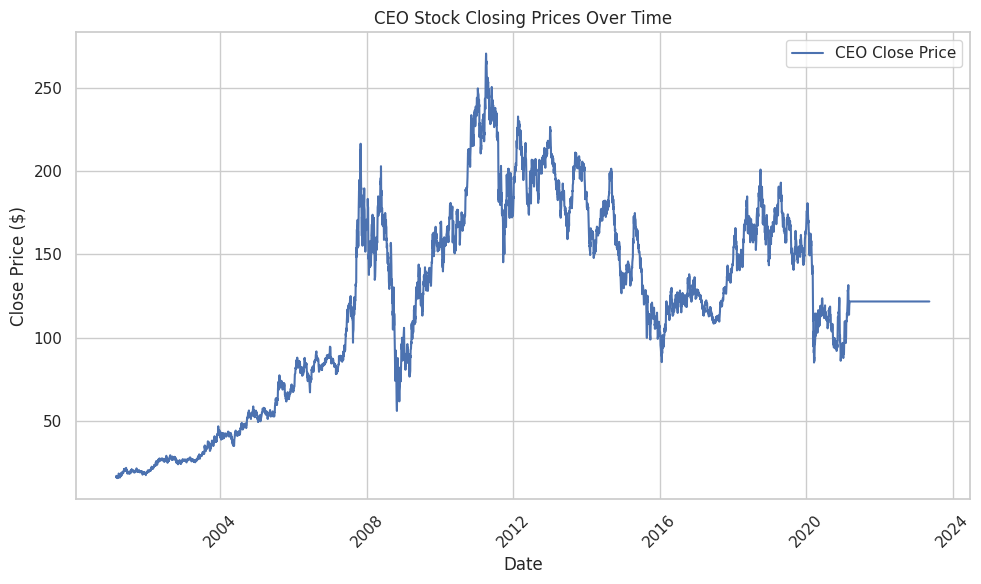

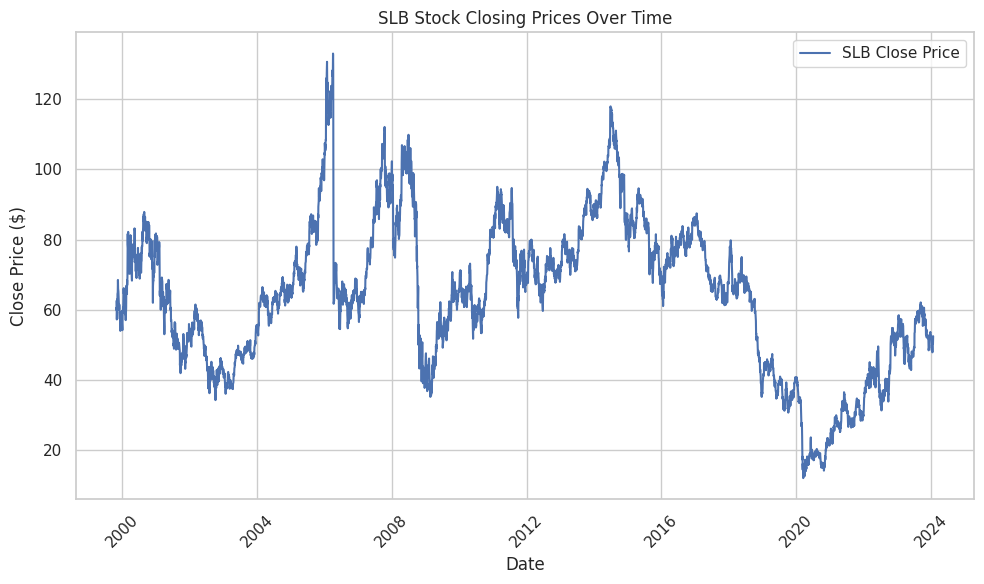

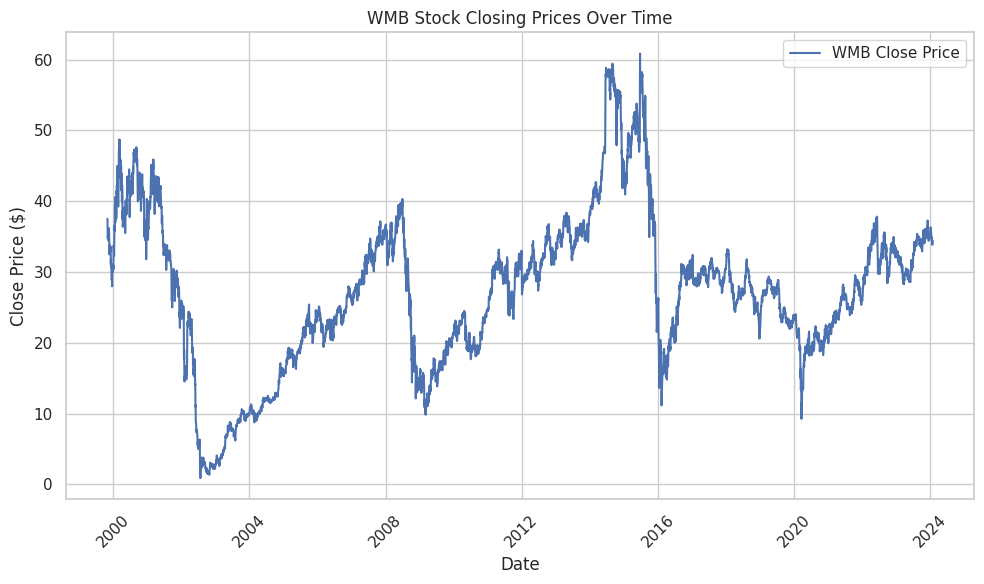

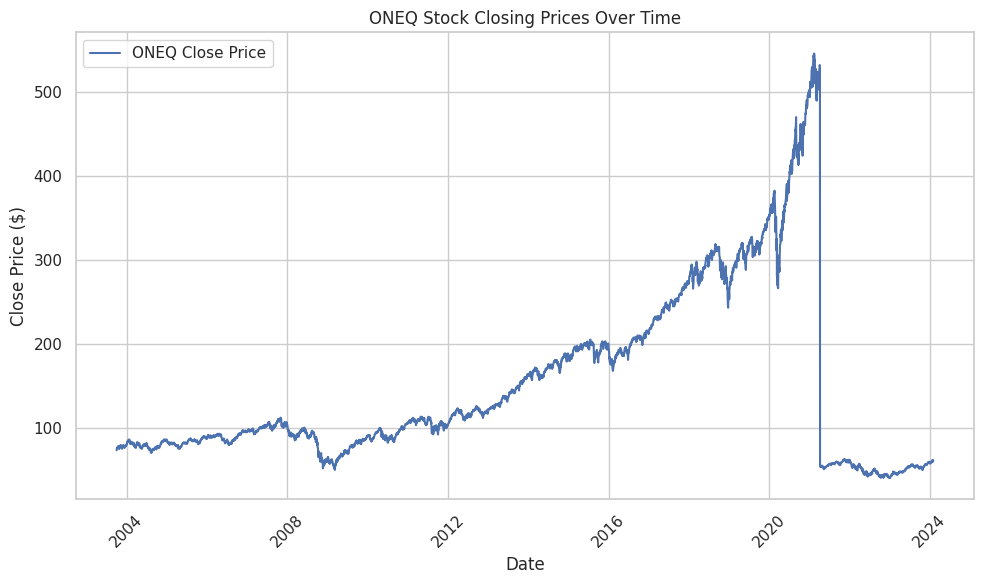

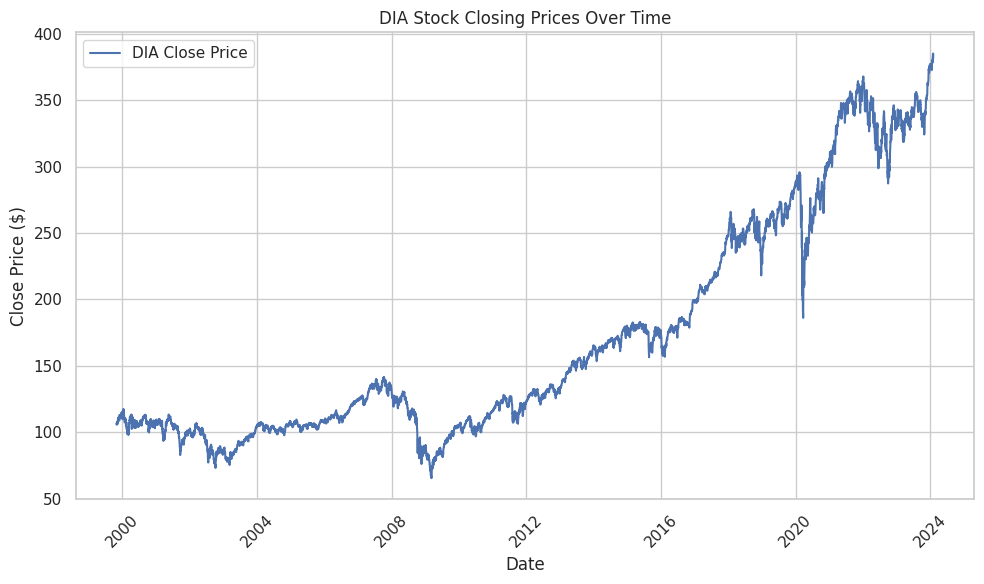

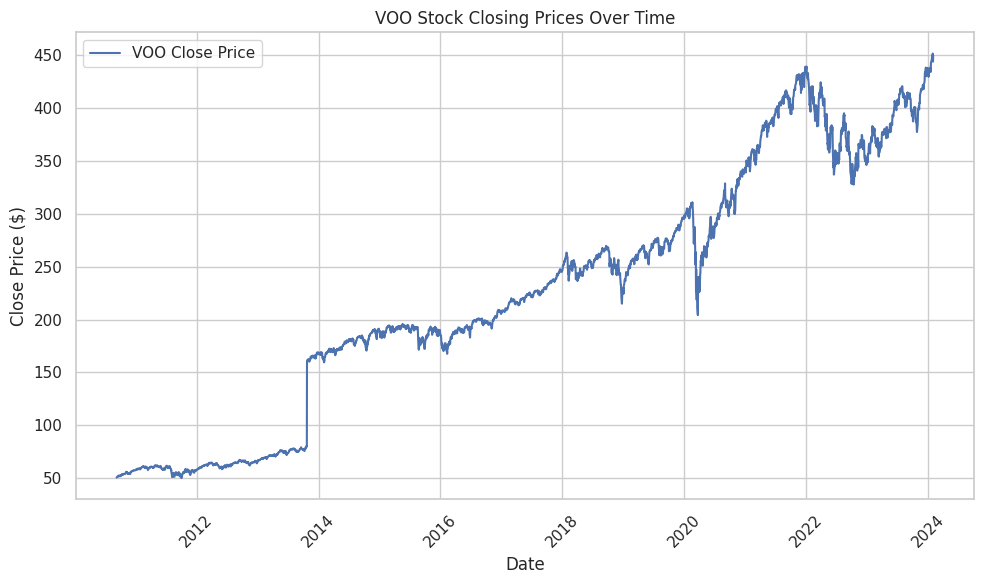

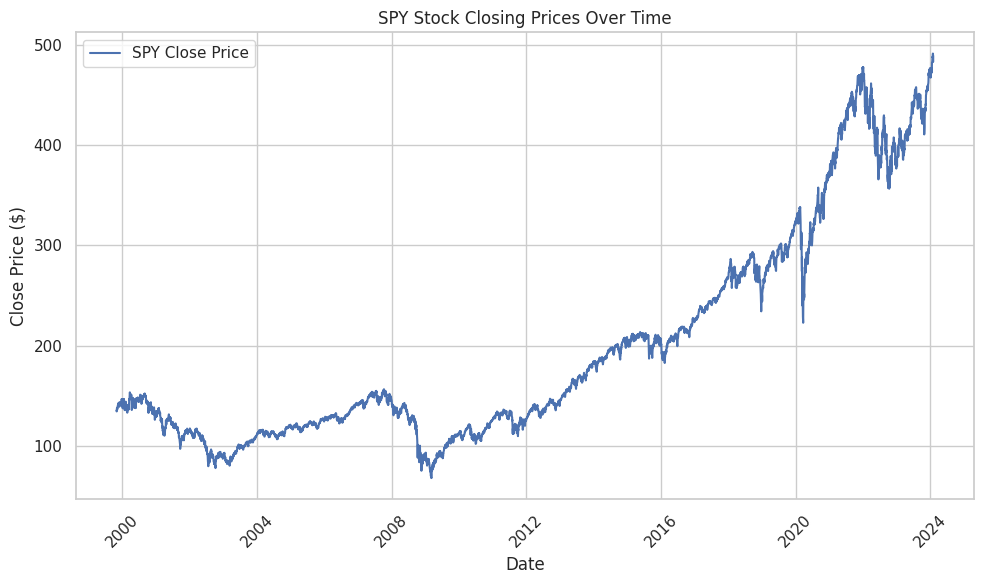

In [ ]:
stocks = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/all_stocks_and_etfs.csv', parse_dates=['Date-Time'])
stocks['Ticker_Symbol'].value_counts()

stocks.rename(columns={'Date-Time': 'Date'}, inplace=True)
stocks['Close'] = pd.to_numeric(stocks['Close'], errors='coerce')
tickers = stocks['Ticker_Symbol'].unique()

for ticker in tickers:
    df_ticker = stocks[stocks['Ticker_Symbol'] == ticker].sort_values('Date')

    plt.plot(df_ticker['Date'], df_ticker['Close'], label=f'{ticker} Close Price')
    plt.title(f'{ticker} Stock Closing Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price ($)')
    plt.grid(True)
    plt.legend()

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [ ]:
stocks['Ticker_Symbol'].value_counts()

Ticker_Symbol
SPY     6102
DIA     6102
HAL     6097
E       6097
OXY     6097
BPT     6097
VLO     6097
CVX     6097
DVN     6097
NOV     6097
EXC     6097
HES     6097
WMB     6097
SLB     6097
EOG     6097
COP     6097
BP      6097
XOM     6097
EPD     6097
CEO     5588
ONEQ    5119
VOO     3372
KMI     3259
MPC     3168
PSX     2966
FANG    2838
BKR     1651
CHK      744
Name: count, dtype: int64

### 3. monthly_gasoline_makeup_percentages.csv

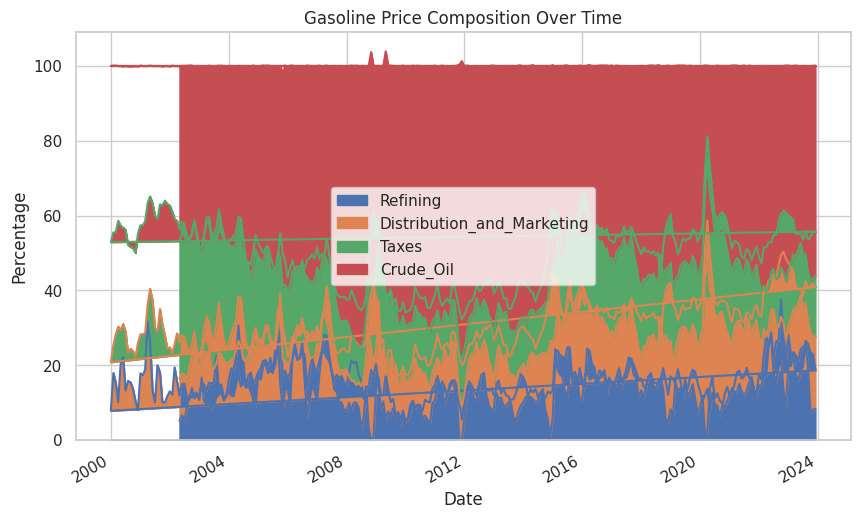

In [ ]:
gas_makeup = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/monthly_gasoline_makeup_percentages.csv', parse_dates=['Date'])

plot_columns = ['Refining', 'Distribution_and_Marketing', 'Taxes', 'Crude_Oil']
# Retail_Price are made from the other four parts
# https://www.eia.gov/petroleum/gasdiesel/

# Check for negative values in the specified columns and replace with 0
for col in plot_columns:
    if (gas_makeup[col] < 0).any():
        print(f"Warning: Negative values found in column '{col}'. Replacing with 0.")
        gas_makeup[col] = gas_makeup[col].clip(lower=0) # Replace negative values with 0

gas_makeup.set_index('Date')[plot_columns].plot.area(stacked=True)
plt.title('Gasoline Price Composition Over Time')
plt.ylabel('Percentage')
plt.xlabel('Date')
plt.show()

### 4. monthly_transportation_statistics.csv

<ipython-input-8-db70c4b13a71>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transportation = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/monthly_transportation_statistics.csv', parse_dates=['Date'])


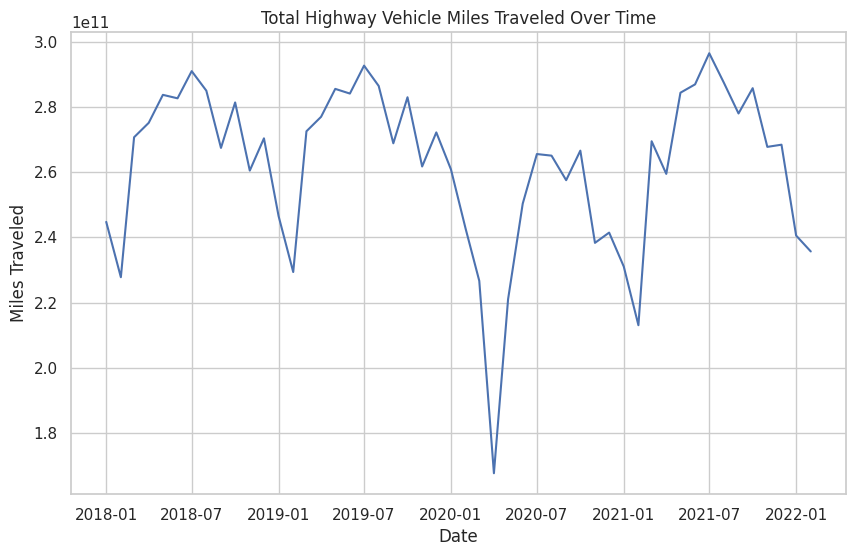

In [ ]:
transportation = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/monthly_transportation_statistics.csv', parse_dates=['Date'])

sns.lineplot(data=transportation, x='Date', y='Highway Vehicle Miles Traveled - All Systems')
plt.title('Total Highway Vehicle Miles Traveled Over Time')
plt.ylabel('Miles Traveled')
plt.xlabel('Date')
plt.show()

### 5. stock_descriptions.csv

   Symbol     AssetType                                         Name  \
0     BKR  Common Stock                         Baker Hughes Company   
1      BP  Common Stock                                   BP PLC ADR   
2     BPT  Common Stock                 BP Prudhoe Bay Royalty Trust   
3     CEO  Common Stock                                CNOOC Limited   
4     CHK  Common Stock                Chesapeake Energy Corporation   
5     COP  Common Stock                               ConocoPhillips   
6     CVX  Common Stock                                 Chevron Corp   
7     DVN  Common Stock                     Devon Energy Corporation   
8       E  Common Stock                                    Eni S.p.A   
9     EOG  Common Stock                            EOG Resources Inc   
10    EPD  Common Stock            Enterprise Products Partners L.P.   
11    EXC  Common Stock                           Exelon Corporation   
12   FANG  Common Stock                     Diamondback Energy, 

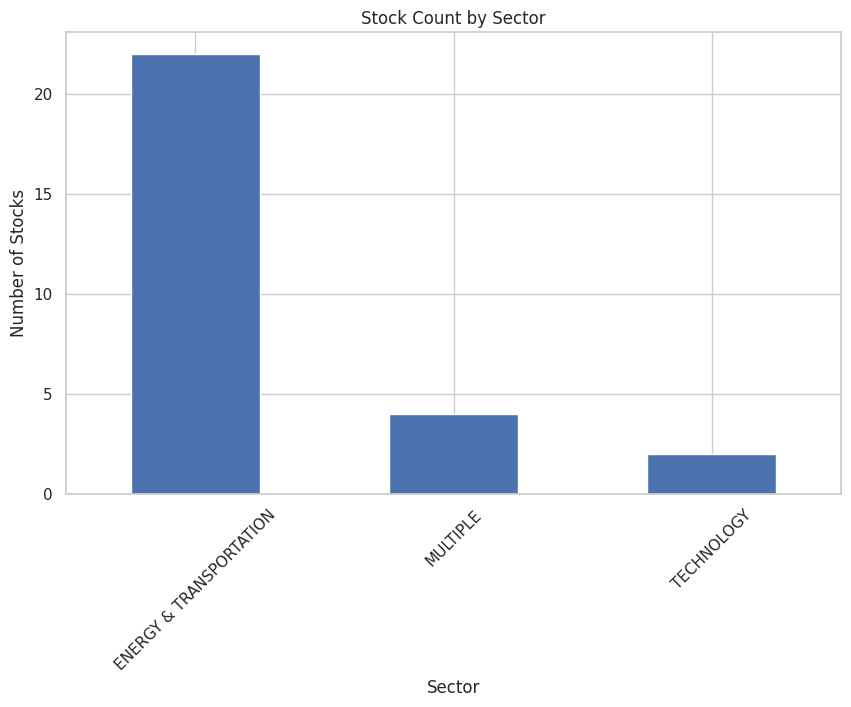

In [ ]:
stock_descriptions = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/stock_descriptions.csv')
print(stock_descriptions)


stock_descriptions['Sector'].value_counts().plot(kind='bar')
plt.title('Stock Count by Sector')
plt.ylabel('Number of Stocks')
plt.xticks(rotation=45)
plt.show()

### 6. weekly_gasoline_prices.csv

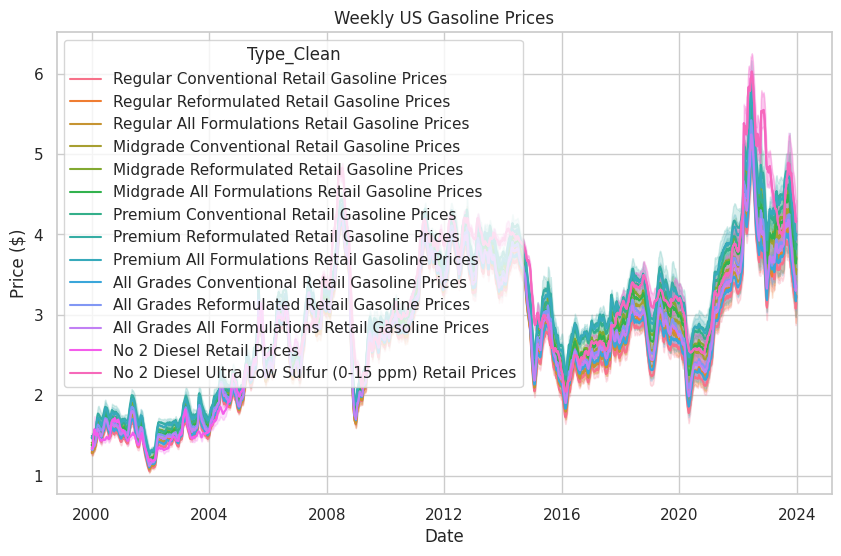

In [ ]:
gas_prices = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/weekly_gasoline_prices.csv', parse_dates=['Date'])

sns.lineplot(data=gas_prices, x='Date', y='Price', hue='Type_Clean')
plt.title('Weekly US Gasoline Prices')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.show()

In [ ]:
latest_date = gas_prices['Date'].max()
latest_data = gas_prices[gas_prices['Date'] == latest_date]

latest_data = latest_data[latest_data['Type_Clean'].str.contains('Regular')]
print(latest_data['Geography'].unique())

['US' 'East Coast' 'New England (PADD 1A)' 'Central Atlantic (PADD 1B)'
 'Lower Atlantic (PADD 1C)' 'Midwest' 'Gulf Coast' 'Rocky Mountain'
 'West Coast' 'California' 'Colorado' 'Florida' 'Massachusetts'
 'Minnesota' 'New York' 'Ohio' 'Texas' 'Washington' 'Boston' 'Chicago'
 'Cleveland' 'Denver' 'Houston' 'Los Angeles' 'Miami' 'New York City'
 'New York Harbor' 'San Francisco' 'Seattle'
 'West Coast (PADD 5) Except California']


In [ ]:
geo_name_map = {
    'US': 'United States',
    'East Coast': 'East Coast',
    'New England (PADD 1A)': 'New England',
    'Central Atlantic (PADD 1B)': 'Central Atlantic',
    'Lower Atlantic (PADD 1C)': 'Lower Atlantic',
    'Midwest': 'Midwest',
    'Gulf Coast': 'Gulf Coast',
    'Rocky Mountain': 'Rocky Mountain',
    'West Coast': 'West Coast',
    'California': 'California',
    'Colorado': 'Colorado',
    'Florida': 'Florida',
    'Massachusetts': 'Massachusetts',
    'Minnesota': 'Minnesota',
    'New York': 'New York (State)',
    'Ohio': 'Ohio',
    'Texas': 'Texas',
    'Washington': 'Washington (State)',
    'Boston': 'Boston',
    'Chicago': 'Chicago',
    'Cleveland': 'Cleveland',
    'Denver': 'Denver',
    'Houston': 'Houston',
    'Los Angeles': 'Los Angeles',
    'Miami': 'Miami',
    'New York City': 'New York City',
    'New York Harbor': 'NY Harbor',
    'San Francisco': 'San Francisco',
    'Seattle': 'Seattle',
    'West Coast (PADD 5) Except California': 'West Coast (ex. CA)'
}

In [ ]:
geo_coords = {
    'US': {'lat': 39.8283, 'lon': -98.5795},
    'East Coast': {'lat': 36.7783, 'lon': -77.0369},
    'New England (PADD 1A)': {'lat': 43.9654, 'lon': -71.6835},
    'Central Atlantic (PADD 1B)': {'lat': 39.0, 'lon': -76.5},
    'Lower Atlantic (PADD 1C)': {'lat': 33.0, 'lon': -80.0},
    'Midwest': {'lat': 41.8500, 'lon': -87.6500},
    'Gulf Coast': {'lat': 29.7604, 'lon': -95.3698},  # Houston area
    'Rocky Mountain': {'lat': 39.5501, 'lon': -105.7821},
    'West Coast': {'lat': 37.7749, 'lon': -122.4194},
    'California': {'lat': 36.7783, 'lon': -119.4179},
    'Colorado': {'lat': 39.5501, 'lon': -105.7821},
    'Florida': {'lat': 27.9944, 'lon': -81.7603},
    'Massachusetts': {'lat': 42.4072, 'lon': -71.3824},
    'Minnesota': {'lat': 46.7296, 'lon': -94.6859},
    'New York': {'lat': 43.0000, 'lon': -75.0000},
    'Ohio': {'lat': 40.4173, 'lon': -82.9071},
    'Texas': {'lat': 31.9686, 'lon': -99.9018},
    'Washington': {'lat': 47.7511, 'lon': -120.7401},
    'Boston': {'lat': 42.3601, 'lon': -71.0589},
    'Chicago': {'lat': 41.8781, 'lon': -87.6298},
    'Cleveland': {'lat': 41.4993, 'lon': -81.6944},
    'Denver': {'lat': 39.7392, 'lon': -104.9903},
    'Houston': {'lat': 29.7604, 'lon': -95.3698},
    'Los Angeles': {'lat': 34.0522, 'lon': -118.2437},
    'Miami': {'lat': 25.7617, 'lon': -80.1918},
    'New York City': {'lat': 40.7128, 'lon': -74.0060},
    'New York Harbor': {'lat': 40.6687, 'lon': -74.0451},
    'San Francisco': {'lat': 37.7749, 'lon': -122.4194},
    'Seattle': {'lat': 47.6062, 'lon': -122.3321},
    'West Coast (PADD 5) Except California': {'lat': 45.0, 'lon': -120.0},
}

In [ ]:
latest_data['Region_Code'] = latest_data['Geography'].map(geo_name_map)

fig = px.bar(
    latest_data,
    x='Region_Code',
    y='Price',
    color='Region_Code',
    title=f'Gasoline Prices by Region on {latest_date.strftime("%Y-%m-%d")}',
    labels={'Price': 'Price ($)', 'Region_Code': 'Region'},
)
fig.show()

In [ ]:
gas_prices['lat'] = gas_prices['Geography'].map(lambda x: geo_coords.get(x, {}).get('lat'))
gas_prices['lon'] = gas_prices['Geography'].map(lambda x: geo_coords.get(x, {}).get('lon'))

latest_date = gas_prices['Date'].max()
map_data = gas_prices[(gas_prices['Date'] == latest_date) & (gas_prices['Type_Clean'].str.contains('Regular'))]

map_data = map_data.dropna(subset=['Price'])

fig = px.scatter_mapbox(
    map_data,
    lat='lat',
    lon='lon',
    color='Price',
    hover_name='Geography',
    size='Price',
    size_max=15,
    zoom=3,
    mapbox_style='carto-positron',
    title=f"Gasoline Prices by Geography on {latest_date.date()}"
)
fig.show()

### 7. weekly_supply_estimates.csv

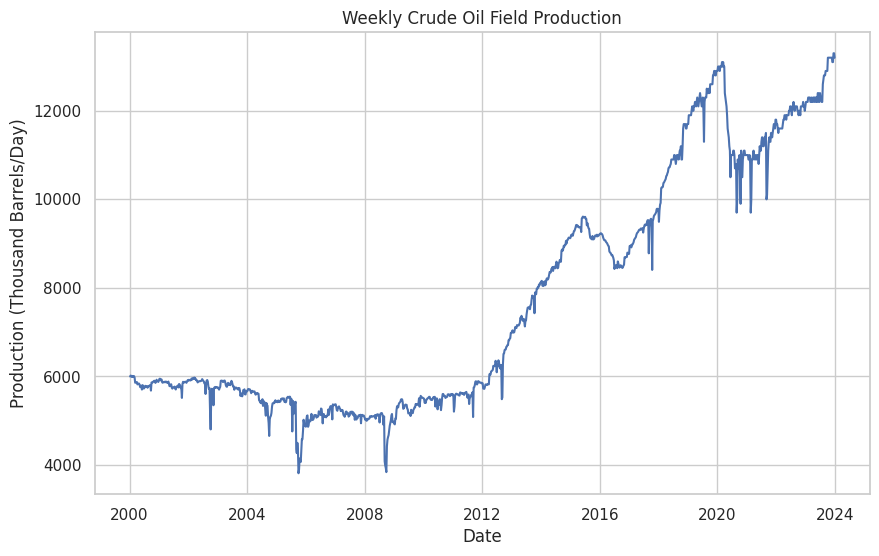

In [ ]:
supply = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/weekly_supply_estimates.csv', parse_dates=['Date'])

sns.lineplot(data=supply, x='Date', y='Weekly U.S. Field Production of Crude Oil  (Thousand Barrels per Day)')
plt.title('Weekly Crude Oil Field Production')
plt.ylabel('Production (Thousand Barrels/Day)')
plt.xlabel('Date')
plt.show()

## 1. Analyzing the Relationship Between U.S. Gasoline Prices and Energy Stock Performance

### a. Stock Price Trends by Supply Chain Position

In [9]:
supply_chain_map = {
    'BKR': 'upstream', 'BP': 'downstream', 'BPT': 'upstream', 'CEO': 'upstream',
    'CHK': 'upstream', 'COP': 'upstream', 'CVX': 'integrated', 'DVN': 'upstream',
    'E': 'integrated', 'EOG': 'upstream', 'EPD': 'midstream', 'EXC': 'downstream',
    'FANG': 'upstream', 'HAL': 'upstream', 'HES': 'upstream', 'KMI': 'midstream',
    'MPC': 'downstream', 'NOV': 'upstream', 'OXY': 'upstream', 'PSX': 'downstream',
    'SLB': 'upstream', 'VLO': 'downstream', 'WMB': 'midstream', 'XOM': 'integrated',
    'DIA': '', 'ONEQ': '', 'SPY': '', 'VOO': ''
}

In [10]:
stocks['Supply_Chain_Position'] = stocks['Ticker_Symbol'].map(supply_chain_map)
display(stocks.head())
display(stocks.tail())

Date   Open   High    Low  Close   Volume Ticker_Symbol  \
28876 2017-07-05  40.80  40.82  37.25  37.25  5883326           BKR   
28875 2017-07-06  38.09  38.09  36.52  37.01  5088097           BKR   
28874 2017-07-07  38.14  38.59  36.12  37.91  6014535           BKR   
28873 2017-07-10  37.63  38.17  36.80  37.23  4721508           BKR   
28872 2017-07-11  37.31  37.78  36.89  37.35  2791176           BKR   

       Daily_Log_Return  Daily_Pct_Return  Daily_High_Low  \
28876               NaN               NaN            3.57   
28875         -0.006464         -0.006443            1.57   
28874          0.024027          0.024318            2.47   
28873         -0.018100         -0.017937            1.37   
28872          0.003218          0.003223            0.89   

       Rolling_Log_Return_Volatility Supply_Chain_Position  
28876                            NaN              upstream  
28875                            NaN              upstream  
28874                            NaN              upstream  
28873                            NaN              upstream  
28872                            NaN              upstream

Date    Open      High     Low   Close    Volume Ticker_Symbol  \
93891 2024-01-19   96.72   97.0156  96.410   96.95  20088432           XOM   
93890 2024-01-22   96.70   97.0950  95.770   96.82  19955946           XOM   
93889 2024-01-23   96.81   98.5000  96.730   97.91  15863433           XOM   
93888 2024-01-24   98.32   99.6500  97.740   99.60  17114423           XOM   
93887 2024-01-25  100.31  102.1800  99.615  102.13  22089510           XOM   

       Daily_Log_Return  Daily_Pct_Return  Daily_High_Low  \
93891          0.001548          0.001550          0.6056   
93890         -0.001342         -0.001341          1.3250   
93889          0.011195          0.011258          1.7700   
93888          0.017113          0.017261          1.9100   
93887          0.025084          0.025402          2.5650   

       Rolling_Log_Return_Volatility Supply_Chain_Position  
93891                       0.013100            integrated  
93890                       0.009766            integrated  
93889                       0.006804            integrated  
93888                       0.008422            integrated  
93887                       0.010921            integrated

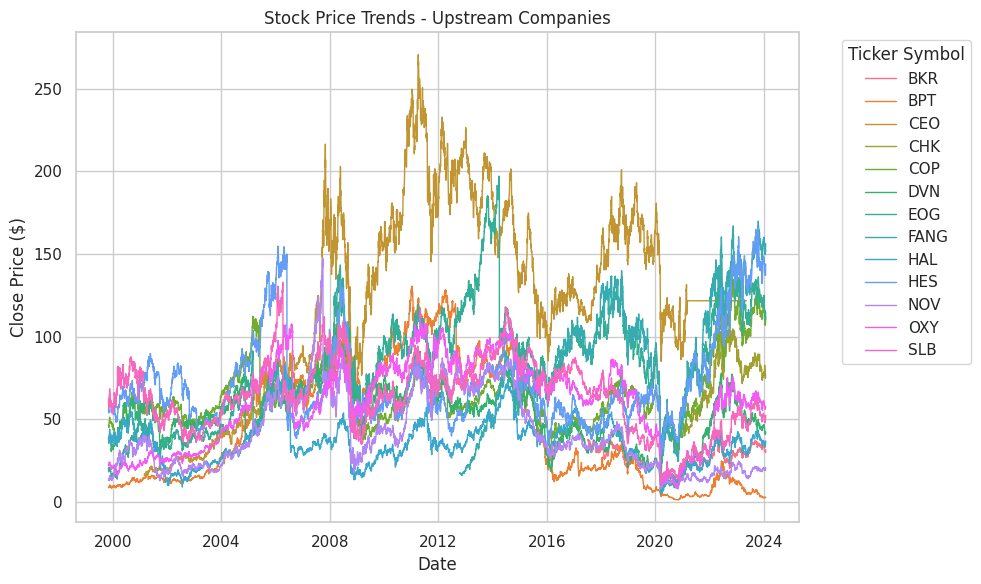

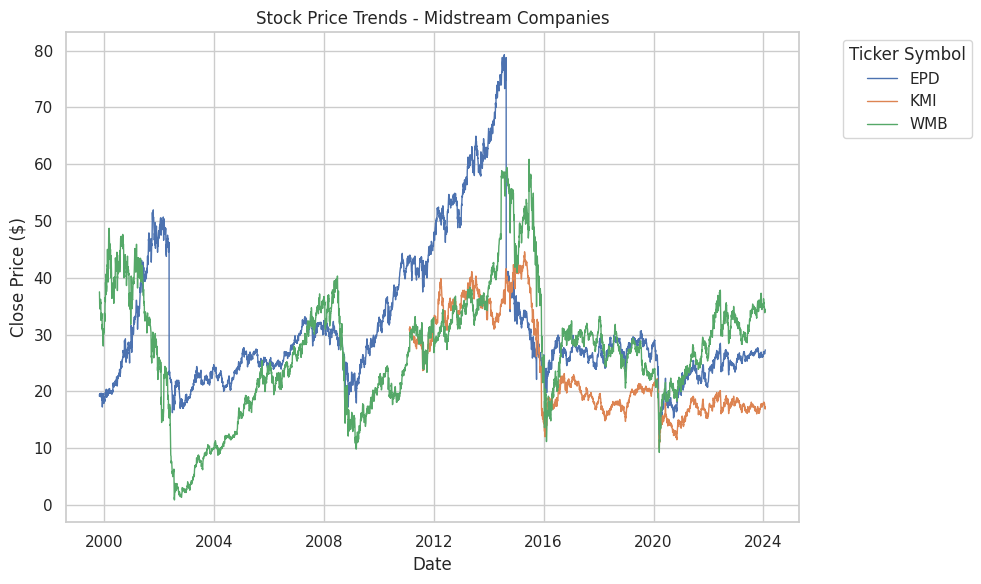

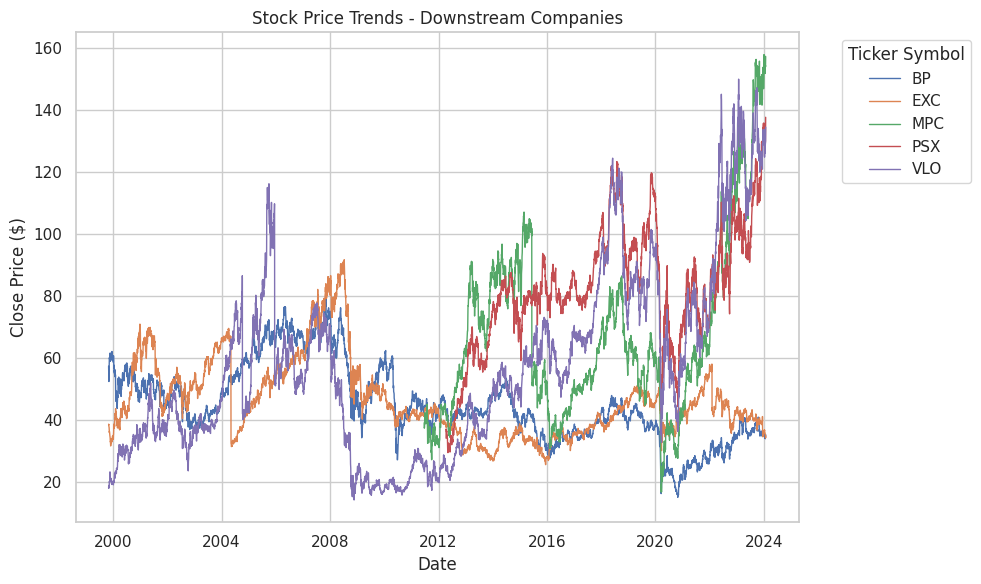

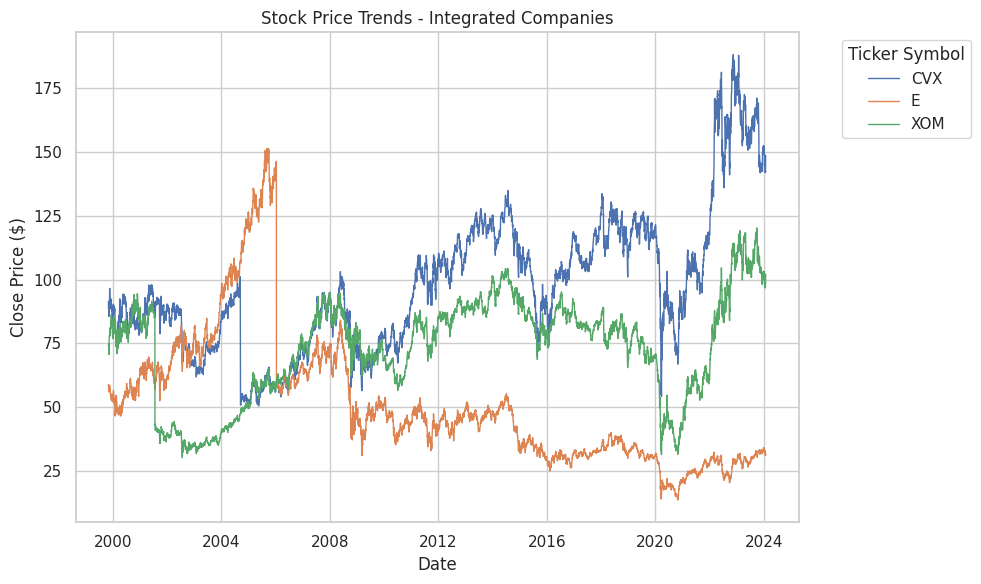

In [11]:
non_etf_stocks = stocks[stocks['Supply_Chain_Position'].isin(['upstream', 'midstream', 'downstream', 'integrated'])].copy()

positions = ['upstream', 'midstream', 'downstream', 'integrated']

for position in positions:
    subset = non_etf_stocks[non_etf_stocks['Supply_Chain_Position'] == position]

    sns.lineplot(
        data=subset,
        x='Date',
        y='Close',
        hue='Ticker_Symbol',
        linewidth=1
    )

    plt.title(f'Stock Price Trends - {position.capitalize()} Companies')
    plt.ylabel('Close Price ($)')
    plt.xlabel('Date')
    plt.legend(title='Ticker Symbol', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

#### Selected Energy Stocks: Cross-Segment Price Trends Visualization

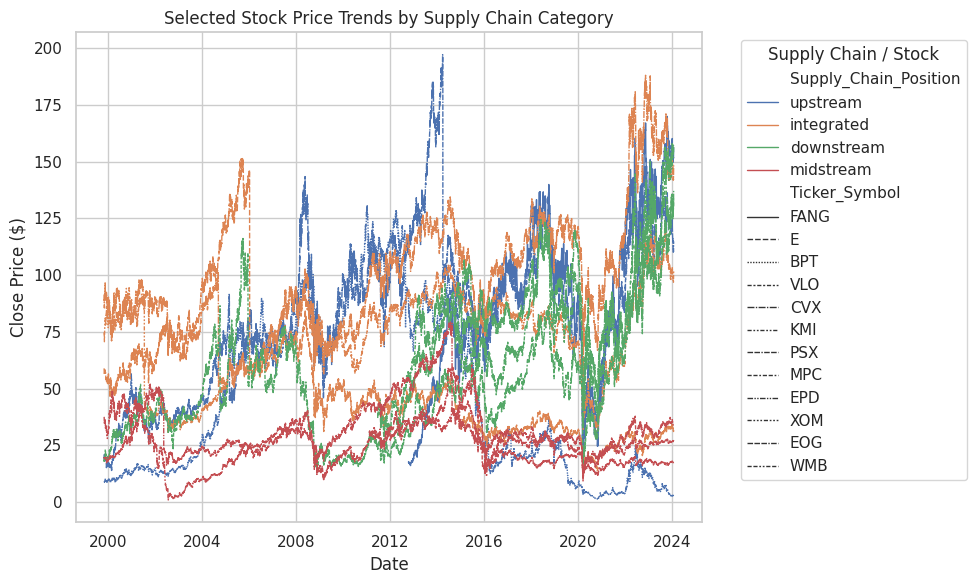

In [ ]:
selected_stocks = {
    'upstream': ['BPT', 'EOG', 'FANG'],
    'midstream': ['KMI', 'EPD', 'WMB'],
    'downstream': ['PSX', 'VLO', 'MPC'],
    'integrated': ['CVX', 'XOM', 'E']
}

selected_tickers = [ticker for group in selected_stocks.values() for ticker in group]
plot_df = stocks[stocks['Ticker_Symbol'].isin(selected_tickers)].copy()

sns.lineplot(
    data=plot_df,
    x='Date',
    y='Close',
    hue='Supply_Chain_Position',
    style='Ticker_Symbol',
    linewidth=1
)

plt.title('Selected Stock Price Trends by Supply Chain Category')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend(title='Supply Chain / Stock', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### b. Correlation Analysis Between Gasoline Prices and Stock Metrics

#### **📢 Data Cleaning and Imputation of Stock Prices and Gasoline Prices**

To ensure the consistency and completeness of our weekly financial and fuel data, we performed the following preprocessing steps:

1. **Stock Data Imputation**:
   For each of the 28 energy-related stocks, we checked for missing values in key numerical columns such as `Close`, `High`, and `Low`. Missing values were imputed using **linear interpolation**, which estimates missing values based on the average of the previous and next available days within the same stock. This method preserves the natural trend and prevents abrupt distortions in daily return calculations.

2. **Daily Log Return and Volatility Calculation**:
   After imputing missing values, we calculated:

   * Daily log returns using `log(Close_t / Close_{t-1})`
   * Daily volatility using the difference between `High` and `Low` prices.

3. **Weekly Aggregation**:
   We aggregated the daily metrics into weekly features by computing the **average daily log return** and **average daily high-low volatility** for each stock, resampled to Fridays (`W-FRI`).

4. **US Gasoline Price Imputation**:
   The weekly gasoline prices for the U.S. (`Geography = 'US'`) were originally reported on Mondays. We shifted them to Fridays to match the stock data's temporal alignment. Any missing gasoline price was also filled using **linear interpolation**, averaging the previous and next available weeks.

These preprocessing steps ensured that both stock and fuel datasets were aligned on a weekly basis and free of missing values, enabling reliable correlation and time-series analyses in subsequent steps.

In [4]:
stocks = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/all_stocks_and_etfs.csv', parse_dates=['Date-Time'])
display(stocks.head())
display(stocks.tail())

Date-Time   Open     High      Low  Close    Volume Ticker_Symbol
0 2024-01-25  37.08  37.2481  35.9997  37.00  11492073           HAL
1 2024-01-24  35.68  36.9500  35.4838  36.83  14397273           HAL
2 2024-01-23  34.48  35.6900  33.9400  35.30  15096866           HAL
3 2024-01-22  33.88  34.6500  33.7750  34.43  11147116           HAL
4 2024-01-19  33.43  33.9800  33.3200  33.97   8908991           HAL

Date-Time      Open      High       Low     Close   Volume  \
144553 1999-11-05  138.6250  139.1093  136.7812  137.8750  7431500   
144554 1999-11-04  136.7500  137.3593  135.7656  136.5312  7907500   
144555 1999-11-03  136.0000  136.3750  135.1250  135.5000  7222300   
144556 1999-11-02  135.9687  137.2500  134.5937  134.5937  6516900   
144557 1999-11-01  136.5000  137.0000  135.5625  135.5625  4006500   

       Ticker_Symbol  
144553           SPY  
144554           SPY  
144555           SPY  
144556           SPY  
144557           SPY

#### Daily

In [33]:
# 1. Stocks data preparation
# Rename and sort
stocks.rename(columns={'Date-Time': 'Date'}, inplace=True)
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.sort_values(['Ticker_Symbol', 'Date'], inplace=True)

# Fill missing values by interpolating within each stock
stocks[['Close', 'High', 'Low']] = stocks.groupby('Ticker_Symbol')[['Close', 'High', 'Low']].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

# I. Calculate daily log returns
stocks['Daily_Log_Return'] = stocks.groupby('Ticker_Symbol')['Close'].transform(
    lambda x: np.log(x / x.shift(1))
)

# II. Calculate daily change percentage
stocks['Daily_Pct_Return'] = stocks.groupby('Ticker_Symbol')['Close'].transform(
    lambda x: (x - x.shift(1)) / x.shift(1)
)

# III. Calculate daily high-low volatility
stocks['Daily_High_Low'] = stocks['High'] - stocks['Low']

# IV. Rolling window volatility (e.g., n=5)
window_size = 5
stocks['Rolling_Log_Return_Volatility'] = stocks.groupby('Ticker_Symbol')['Daily_Log_Return'].transform(
    lambda r: r.rolling(window=window_size).std()
)

stocks.to_csv('all_stocks_and_etfs_daily.csv', index=False)

display(stocks.head())
display(stocks.tail())

Date   Open   High    Low  Close   Volume Ticker_Symbol  \
28876 2017-07-05  40.80  40.82  37.25  37.25  5883326           BKR   
28875 2017-07-06  38.09  38.09  36.52  37.01  5088097           BKR   
28874 2017-07-07  38.14  38.59  36.12  37.91  6014535           BKR   
28873 2017-07-10  37.63  38.17  36.80  37.23  4721508           BKR   
28872 2017-07-11  37.31  37.78  36.89  37.35  2791176           BKR   

       Daily_Log_Return  Daily_Pct_Return  Daily_High_Low  \
28876               NaN               NaN            3.57   
28875         -0.006464         -0.006443            1.57   
28874          0.024027          0.024318            2.47   
28873         -0.018100         -0.017937            1.37   
28872          0.003218          0.003223            0.89   

       Rolling_Log_Return_Volatility Supply_Chain_Position   Close_Z  
28876                            NaN              upstream  1.649142  
28875                            NaN              upstream  1.611953  
28874                            NaN              upstream  1.751412  
28873                            NaN              upstream  1.646043  
28872                            NaN              upstream  1.664638

Date    Open      High     Low   Close    Volume Ticker_Symbol  \
93891 2024-01-19   96.72   97.0156  96.410   96.95  20088432           XOM   
93890 2024-01-22   96.70   97.0950  95.770   96.82  19955946           XOM   
93889 2024-01-23   96.81   98.5000  96.730   97.91  15863433           XOM   
93888 2024-01-24   98.32   99.6500  97.740   99.60  17114423           XOM   
93887 2024-01-25  100.31  102.1800  99.615  102.13  22089510           XOM   

       Daily_Log_Return  Daily_Pct_Return  Daily_High_Low  \
93891          0.001548          0.001550          0.6056   
93890         -0.001342         -0.001341          1.3250   
93889          0.011195          0.011258          1.7700   
93888          0.017113          0.017261          1.9100   
93887          0.025084          0.025402          2.5650   

       Rolling_Log_Return_Volatility Supply_Chain_Position   Close_Z  
93891                       0.013100            integrated  1.203403  
93890                       0.009766            integrated  1.196825  
93889                       0.006804            integrated  1.251976  
93888                       0.008422            integrated  1.337484  
93887                       0.010921            integrated  1.465493

In [34]:
# Load gasoline prices (assuming weekly_gasoline_prices.csv format)
gas = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/weekly_gasoline_prices.csv', parse_dates=['Date'])
gas['Date'] = pd.to_datetime(gas['Date'])

In [35]:
gas_us = gas[gas['Geography'] == 'US'][['Date', 'Price']].copy()
gas_us['Date'] = pd.to_datetime(gas_us['Date'])
gas_us = gas_us.drop_duplicates(subset='Date')  # keep='first' by default
gas_us = gas_us.set_index('Date').sort_index()

# Same as above
daily_index = pd.date_range(start=gas_us.index.min(), end=gas_us.index.max(), freq='D')
gas_us_daily = gas_us.reindex(daily_index)
gas_us_daily['Interpolated_Price'] = gas_us_daily['Price'].interpolate(method='linear')
gas_us_daily['Ffill_Price'] = gas_us_daily['Price'].ffill()

gas_us_daily['Daily_Log_Return_Interpolated'] = np.log(gas_us_daily['Interpolated_Price']) - np.log(gas_us_daily['Interpolated_Price'].shift(1))
gas_us_daily['Daily_Log_Return_Ffill_Price'] = np.log(gas_us_daily['Ffill_Price']) - np.log(gas_us_daily['Ffill_Price'].shift(1))
gas_us_daily = gas_us_daily.reset_index().rename(columns={'index': 'Date'})

gas_us_daily.to_csv('gasoline_daily_interpolated.csv', index=False)

In [36]:
merged = pd.merge(
    stocks,
    gas_us_daily[['Date', 'Daily_Log_Return_Interpolated', 'Daily_Log_Return_Ffill_Price']],
    on='Date',
    how='inner'
)

merged_clean = merged.dropna(subset=['Daily_Log_Return', 'Daily_Pct_Return', 'Daily_Log_Return_Interpolated', 'Daily_Log_Return_Ffill_Price'])

# compute correlation matrix for each ticker
def compute_correlations(df):
    results = []
    for ticker, group in df.groupby('Ticker_Symbol'):
        corr_log_interp = group['Daily_Log_Return'].corr(group['Daily_Log_Return_Interpolated'])
        corr_log_ffill = group['Daily_Log_Return'].corr(group['Daily_Log_Return_Ffill_Price'])
        corr_pct_interp = group['Daily_Pct_Return'].corr(group['Daily_Log_Return_Interpolated'])
        corr_pct_ffill = group['Daily_Pct_Return'].corr(group['Daily_Log_Return_Ffill_Price'])
        corr_vol_interp = group['Daily_High_Low'].corr(group['Daily_Log_Return_Interpolated'])
        corr_vol_ffill = group['Daily_High_Low'].corr(group['Daily_Log_Return_Ffill_Price'])
        corr_r_vol_interp = group['Rolling_Log_Return_Volatility'].corr(group['Daily_Log_Return_Interpolated'])
        corr_r_vol_ffill = group['Rolling_Log_Return_Volatility'].corr(group['Daily_Log_Return_Ffill_Price'])

        results.append({
            'Ticker_Symbol': ticker,
            'Corr_Log_vs_Gasoline_Interpolated': corr_log_interp,
            'Corr_Log_vs_Gasoline_Ffill': corr_log_ffill,
            'Corr_Pct_vs_Gasoline_Interpolated': corr_pct_interp,
            'Corr_Pct_vs_Gasoline_Ffill': corr_pct_ffill,
            'Corr_Vol_vs_Gasoline_Interpolated': corr_vol_interp,
            'Corr_Vol_vs_Gasoline_Ffill': corr_vol_ffill,
            'Corr_R_Vol_vs_Gasoline_Interpolated': corr_r_vol_interp,
            'Corr_R_Vol_vs_Gasoline_Ffill': corr_r_vol_ffill,
        })
    return pd.DataFrame(results)

correlation_results = compute_correlations(merged_clean)

correlation_results['Supply_Chain_Position'] = correlation_results['Ticker_Symbol'].map(supply_chain_map)

display(correlation_results)

Ticker_Symbol  Corr_Log_vs_Gasoline_Interpolated  \
0            BKR                           0.070224   
1             BP                           0.046140   
2            BPT                           0.045776   
3            CEO                           0.044904   
4            CHK                           0.010144   
5            COP                           0.063686   
6            CVX                           0.046216   
7            DIA                           0.004098   
8            DVN                           0.056439   
9              E                           0.038245   
10           EOG                           0.034093   
11           EPD                           0.023404   
12           EXC                           0.007609   
13          FANG                           0.038283   
14           HAL                           0.061232   
15           HES                           0.051035   
16           KMI                           0.038551   
17           MPC                           0.070646   
18           NOV                           0.055247   
19          ONEQ                           0.008851   
20           OXY                           0.055184   
21           PSX                           0.056902   
22           SLB                           0.042626   
23           SPY                           0.008925   
24           VLO                           0.070731   
25           VOO                          -0.003426   
26           WMB                           0.037135   
27           XOM                           0.036804   

    Corr_Log_vs_Gasoline_Ffill  Corr_Pct_vs_Gasoline_Interpolated  \
0                     0.059275                           0.065379   
1                     0.004555                           0.041152   
2                     0.003711                           0.044417   
3                    -0.017744                           0.039057   
4                    -0.006694                           0.010270   
5                     0.012163                           0.061208   
6                    -0.000236                           0.041771   
7                    -0.019460                          -0.000435   
8                     0.014446                           0.051715   
9                     0.002689                           0.036072   
10                    0.007024                           0.032963   
11                    0.001905                           0.021194   
12                    0.007364                           0.007072   
13                    0.043449                           0.032632   
14                    0.015814                           0.057469   
15                    0.008786                           0.049861   
16                    0.068471                           0.032741   
17                    0.030558                           0.071306   
18                    0.011803                           0.049149   
19                   -0.001954                           0.010552   
20                    0.008836                           0.050901   
21                    0.042770                           0.052653   
22                    0.004596                           0.041519   
23                   -0.025943                           0.004595   
24                   -0.007259                           0.071832   
25                    0.017549                          -0.009748   
26                    0.000232                           0.031846   
27                   -0.000736                           0.033536   

    Corr_Pct_vs_Gasoline_Ffill  Corr_Vol_vs_Gasoline_Interpolated  \
0                     0.056211                           0.048581   
1                     0.001063                          -0.164689   
2                     0.004363                          -0.117639   
3                    -0.021266                          -0.115625   
4                    -0.006007                          -0.0

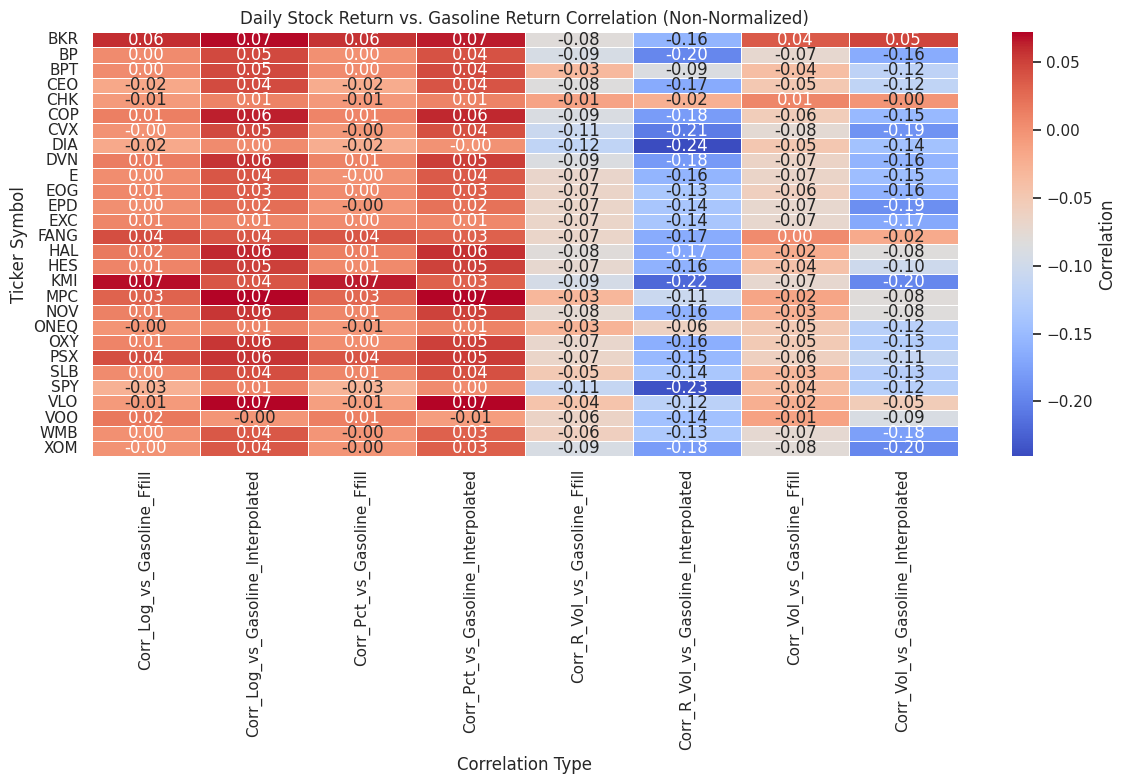

In [37]:
melted = correlation_results.melt(id_vars=['Ticker_Symbol', 'Supply_Chain_Position'],
                                  var_name='Correlation_Type',
                                  value_name='Correlation')

heatmap_data = melted.pivot_table(index='Ticker_Symbol',
                                  columns='Correlation_Type',
                                  values='Correlation')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('Daily Stock Return vs. Gasoline Return Correlation (Non-Normalized)')
plt.ylabel('Ticker Symbol')
plt.xlabel('Correlation Type')
plt.tight_layout()
plt.show()

漲幅沒有因為因為。可以研究跟成交量有關的。新角度的觀點研究買賣訊號。

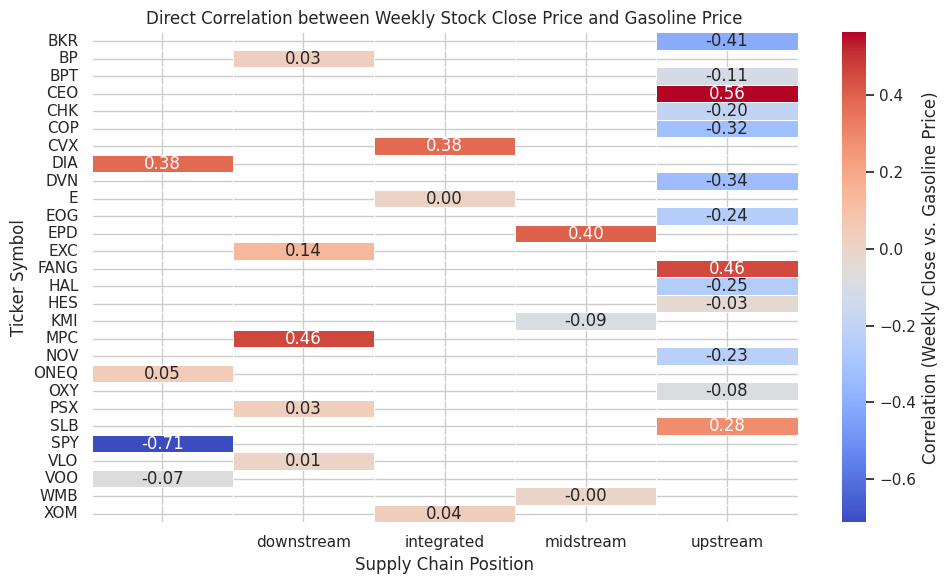

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

weekly_stock_price = stocks.groupby('Ticker_Symbol').resample('W-MON', on='Date')['Close'].last().reset_index()
weekly_stock_price = weekly_stock_price.rename(columns={'Close': 'Weekly_Close'})

gas_us = gas[gas['Geography'] == 'US'][['Date', 'Price']].copy()
gas_us['Date'] = pd.to_datetime(gas_us['Date'])

merged_direct = pd.merge(
    weekly_stock_price,
    gas_us,
    on='Date',
    how='inner'
)

def compute_direct_weekly_correlation(df):
    results = []
    for ticker, group in df.groupby('Ticker_Symbol'):
        corr = group['Weekly_Close'].corr(group['Price'])
        results.append({
            'Ticker_Symbol': ticker,
            'Corr_Close_vs_Gasoline': corr
        })
    return pd.DataFrame(results)

direct_corr_df = compute_direct_weekly_correlation(merged_direct)

# Add supply chain position
direct_corr_df['Supply_Chain_Position'] = direct_corr_df['Ticker_Symbol'].map(supply_chain_map)

heatmap_direct = direct_corr_df.pivot_table(
    index='Ticker_Symbol',
    columns='Supply_Chain_Position',
    values='Corr_Close_vs_Gasoline',
    aggfunc='first'
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_direct,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation (Weekly Close vs. Gasoline Price)'}
)
plt.title('Direct Correlation between Weekly Stock Close Price and Gasoline Price')
plt.xlabel('Supply Chain Position')
plt.ylabel('Ticker Symbol')
plt.tight_layout()
plt.show()

In [14]:
stocks['Close_Z'] = stocks.groupby('Ticker_Symbol')['Close'].transform(
    lambda x: (x - x.mean()) / x.std()
)

In [15]:
gas_us_daily['Price_Z'] = (gas_us_daily['Interpolated_Price'] - gas_us_daily['Interpolated_Price'].mean()) / gas_us_daily['Interpolated_Price'].std()

In [16]:
merged_daily = pd.merge(
    stocks[['Date', 'Ticker_Symbol', 'Close_Z']],
    gas_us_daily[['Date', 'Price_Z']],
    on='Date',
    how='inner'
)

daily_corr_results = merged_daily.groupby('Ticker_Symbol').apply(
    lambda df: df['Close_Z'].corr(df['Price_Z'])
).reset_index(name='Daily_Zscore_Correlation')

daily_corr_results['Supply_Chain_Position'] = daily_corr_results['Ticker_Symbol'].map(supply_chain_map)


<ipython-input-16-fdbd930167d4>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_corr_results = merged_daily.groupby('Ticker_Symbol').apply(


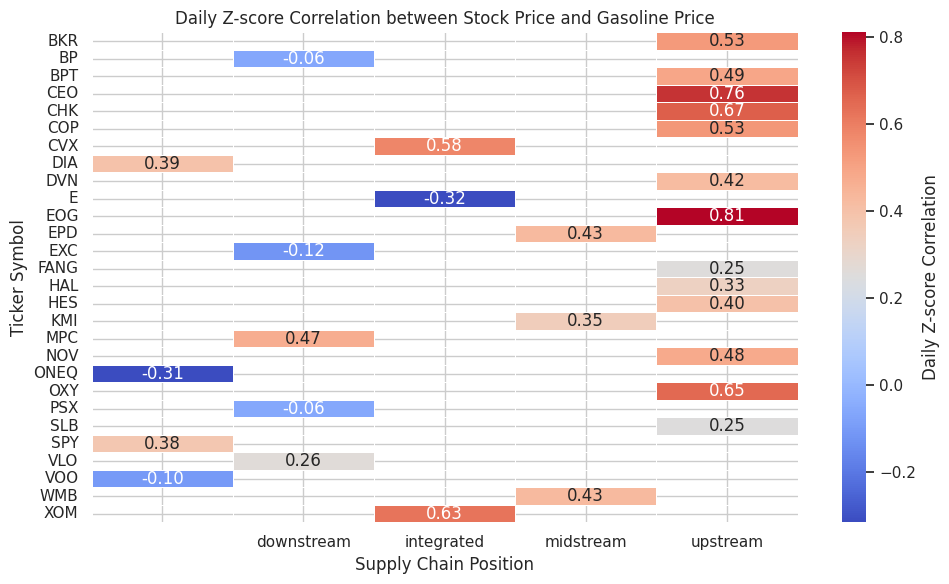

In [17]:
heatmap_daily = daily_corr_results.pivot_table(
    index='Ticker_Symbol',
    columns='Supply_Chain_Position',
    values='Daily_Zscore_Correlation',
    aggfunc='first'
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_daily,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Daily Z-score Correlation'}
)
plt.title('Daily Z-score Correlation between Stock Price and Gasoline Price')
plt.xlabel('Supply Chain Position')
plt.ylabel('Ticker Symbol')
plt.tight_layout()
plt.show()

#### Weekly

In [21]:
# Step 1: Preparation
stocks.rename(columns={'Date-Time': 'Date'}, inplace=True)
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.sort_values(['Ticker_Symbol', 'Date'], inplace=True)

# Step 2: Interpolate missing values
stocks[['Close', 'High', 'Low', 'Open']] = stocks.groupby('Ticker_Symbol')[['Close', 'High', 'Low', 'Open']].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

# Step 3: Compute Weekly Metrics
weekly_features_list = []

for ticker, group in stocks.groupby('Ticker_Symbol'):
    group = group.set_index('Date')

    # I. Weekly log return: log(Close_t / Close_t-1)
    weekly_log_return = np.log(group['Close'].resample('W-MON').last() / group['Close'].resample('W-MON').last().shift(1))

    # II. Weekly high-low volatility: mean of (High - Low)
    weekly_volatility = (group['High'] - group['Low']).resample('W-MON').mean()

    # III. Weekly open-close gap: Friday Close - Monday Open (same week)
    monday_open = group['Open'].resample('W-MON').first()
    friday_close = group['Close'].resample('W-MON').last()
    open_close_gap = friday_close - monday_open

    # IV. Weekly variance
    weekly_variance = group['Close'].resample('W-MON').var()
    weekly_std = group['Close'].resample('W-MON').std()

    # Combine into DataFrame
    combined = pd.DataFrame({
        'Weekly_Log_Return': weekly_log_return,
        'Weekly_Volatility': weekly_volatility,
        'Weekly_Open_Close_Gap': open_close_gap,
        'Weekly_Variance': weekly_variance,
        'Weekly_Std': weekly_std,
    })
    combined['Ticker_Symbol'] = ticker
    combined = combined.reset_index()

    weekly_features_list.append(combined)

# Concatenate all
weekly_stock_metrics_final = pd.concat(weekly_features_list, ignore_index=True)

display(weekly_stock_metrics_final.head())
display(weekly_stock_metrics_final.tail())

Date  Weekly_Log_Return  Weekly_Volatility  Weekly_Open_Close_Gap  \
0 2017-07-10                NaN            2.24500                  -3.57   
1 2017-07-17           0.010952            0.78100                   0.33   
2 2017-07-24          -0.091174            1.16800                  -3.16   
3 2017-07-31           0.071047            1.36486                   2.08   
4 2017-08-07          -0.065244            0.74500                  -2.26   

   Weekly_Variance  Weekly_Std Ticker_Symbol  
0          0.15120    0.388844           BKR  
1          0.08415    0.290086           BKR  
2          1.50337    1.226120           BKR  
3          0.54305    0.736919           BKR  
4          0.17265    0.415512           BKR

Date  Weekly_Log_Return  Weekly_Volatility  Weekly_Open_Close_Gap  \
30011 2024-01-01          -0.019120           1.145000                  -2.76   
30012 2024-01-08           0.009358           2.028740                   0.00   
30013 2024-01-15          -0.009658           1.539925                  -1.34   
30014 2024-01-22          -0.031816           1.412120                  -3.00   
30015 2024-01-29           0.053393           2.081667                   5.32   

       Weekly_Variance  Weekly_Std Ticker_Symbol  
30011         1.143825    1.069498           XOM  
30012         0.715800    0.846050           XOM  
30013         0.438767    0.662395           XOM  
30014         0.134970    0.367383           XOM  
30015         4.510900    2.123888           XOM

In [22]:
gas_us = gas[gas['Geography'] == 'US'].copy()
gas_us = gas_us[['Date', 'Price']].sort_values('Date')

gas_us['Weekly_Log_Return'] = np.log(gas_us['Price']) - np.log(gas_us['Price'].shift(1))
gas_us['Weekly_Pct_Change'] = (gas_us['Price'] - gas_us['Price'].shift(1)) / gas_us['Price'].shift(1)

display(gas_us.head())
display(gas_us.tail())

Date  Price  Weekly_Log_Return  Weekly_Pct_Change
0     2000-01-03  1.260                NaN                NaN
15024 2000-01-03  1.309           0.038152           0.038889
12520 2000-01-03  1.365           0.041891           0.042781
1252  2000-01-03  1.306          -0.044185          -0.043223
3756  2000-01-03  1.353           0.035355           0.035988

Date  Price  Weekly_Log_Return  Weekly_Pct_Change
16275 2023-12-25  3.914           0.127056           0.135480
3755  2023-12-25  3.116          -0.228010          -0.203883
2503  2023-12-25  3.357           0.074498           0.077343
8763  2023-12-25  3.822           0.129726           0.138517
17157 2023-12-25  3.914           0.023786           0.024071

In [24]:
merged_weekly = pd.merge(
    weekly_stock_metrics_final,
    gas_us[['Date', 'Weekly_Log_Return']],
    on='Date',
    how='inner',
    suffixes=('', '_Gasoline')
)

def compute_weekly_correlations(df):
    results = []
    for ticker, group in df.groupby('Ticker_Symbol'):
        corr_log = group['Weekly_Log_Return'].corr(group['Weekly_Log_Return_Gasoline'])
        corr_gap = group['Weekly_Open_Close_Gap'].corr(group['Weekly_Log_Return_Gasoline'])
        corr_vol = group['Weekly_Volatility'].corr(group['Weekly_Log_Return_Gasoline'])
        corr_var = group['Weekly_Variance'].corr(group['Weekly_Log_Return_Gasoline'])
        corr_std = group['Weekly_Std'].corr(group['Weekly_Log_Return_Gasoline'])

        results.append({
            'Ticker_Symbol': ticker,
            'Corr_Log_Return': corr_log,
            'Corr_Open_Close_Gap': corr_gap,
            'Corr_Volatility': corr_vol,
            'Corr_Variance': corr_var,
            'Corr_Std': corr_std,
        })
    return pd.DataFrame(results)

weekly_correlation_results = compute_weekly_correlations(merged_weekly)

weekly_correlation_results['Supply_Chain_Position'] = weekly_correlation_results['Ticker_Symbol'].map(supply_chain_map)

display(weekly_correlation_results)

Ticker_Symbol  Corr_Log_Return  Corr_Open_Close_Gap  Corr_Volatility  \
0            BKR        -0.002377            -0.002379        -0.000769   
1             BP         0.000981             0.001603        -0.002586   
2            BPT         0.002926             0.004233        -0.002045   
3            CEO         0.002065             0.001533        -0.001282   
4            CHK         0.004112             0.002045        -0.001289   
5            COP         0.002759             0.001915        -0.001987   
6            CVX         0.000467            -0.000097        -0.003622   
7            DIA        -0.001068            -0.001887        -0.003438   
8            DVN         0.003649             0.003077        -0.002885   
9              E         0.001703             0.001641        -0.003117   
10           EOG         0.002312             0.001290        -0.002078   
11           EPD         0.000248             0.000987        -0.001689   
12           EXC        -0.001943            -0.001970        -0.003133   
13          FANG         0.001616            -0.000114         0.000295   
14           HAL         0.001366             0.001394        -0.000502   
15           HES         0.001257             0.000999        -0.001347   
16           KMI        -0.000215             0.000203        -0.003562   
17           MPC         0.000052             0.000823        -0.000630   
18           NOV         0.001842             0.002132        -0.001483   
19          ONEQ         0.003195             0.003039        -0.002793   
20           OXY         0.002597             0.003352        -0.002043   
21           PSX         0.001432             0.001666         0.000230   
22           SLB         0.000652             0.001585        -0.001746   
23           SPY        -0.000431            -0.001188        -0.003960   
24           VLO         0.001698             0.001871        -0.000470   
25           VOO        -0.001944            -0.002952        -0.003182   
26           WMB         0.005055             0.004940        -0.002992   
27           XOM         0.000537             0.000659        -0.003361   

    Corr_Variance  Corr_Std Supply_Chain_Position  
0        0.001492  0.000922              upstream  
1       -0.000450 -0.002129            downstream  
2       -0.002541 -0.002395              upstream  
3       -0.001003 -0.002559              upstream  
4        0.000436 -0.002076              upstream  
5        0.000975 -0.001388              upstream  
6       -0.001151 -0.003727            integrated  
7        0.000953 -0.003130                        
8       -0.004202 -0.004962              upstream  
9        0.000824 -0.000313            integrated  
10      -0.002129 -0.003328              upstream  
11      -0.000107 -0.000142             midstream  
12       0.002589  0.000971            downstream  
13       0.000545 -0.000497              upstream  
14       0.001209 -0.002117              upstream  
15       0.000809 -0.000739              upstream  
16      -0.005228 -0.004621             midstream  
17       0.004359  0.002661            downstream  
18      -0.000473 -0.002951              upstream  
19      -0.003200 -0.003616                        
20      -0.000705 -0.002256              upstream  
21       0.002670  0.000822            downstream  
22      -0.000609 -0.002156              upstream  
23      -0.000880 -0.003870                        
24       0.000756  0.000077            downstream  
25      -0.003344 -0.004666                        
26      -0.003544 -0.004421             midstream  
27      -0.000748 -0.002989            integrated

In [25]:
# add the close price on Friday
weekly_stock_price = stocks.groupby('Ticker_Symbol').resample('W-MON', on='Date')['Close'].last().reset_index()
weekly_stock_price = weekly_stock_price.rename(columns={'Close': 'Weekly_Close'})

weekly_stock_price['Weekly_Close_Z'] = weekly_stock_price.groupby('Ticker_Symbol')['Weekly_Close'].transform(
    lambda x: (x - x.mean()) / x.std()
)

gas_us = gas[gas['Geography'] == 'US'][['Date', 'Price']].copy()
gas_us['Date'] = pd.to_datetime(gas_us['Date'])
gas_us['Price_Z'] = (gas_us['Price'] - gas_us['Price'].mean()) / gas_us['Price'].std()

normalized_df = pd.merge(
    weekly_stock_price,
    gas_us[['Date', 'Price_Z']],
    on='Date',
    how='inner'
)

# correlation (z-normalized values)
correlation_results = normalized_df.groupby('Ticker_Symbol').apply(
    lambda g: g['Weekly_Close_Z'].corr(g['Price_Z'])
).reset_index(name='Zscore_Correlation')

correlation_results['Supply_Chain_Position'] = correlation_results['Ticker_Symbol'].map(supply_chain_map)

display(correlation_results)

<ipython-input-25-79244b356f6c>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_results = normalized_df.groupby('Ticker_Symbol').apply(


Ticker_Symbol  Zscore_Correlation Supply_Chain_Position
0            BKR           -0.406399              upstream
1             BP            0.034949            downstream
2            BPT           -0.111800              upstream
3            CEO            0.564661              upstream
4            CHK           -0.195863              upstream
5            COP           -0.320134              upstream
6            CVX            0.379757            integrated
7            DIA            0.380818                      
8            DVN           -0.335634              upstream
9              E            0.004473            integrated
10           EOG           -0.244795              upstream
11           EPD            0.402111             midstream
12           EXC            0.143840            downstream
13          FANG            0.455875              upstream
14           HAL           -0.250044              upstream
15           HES           -0.030026              upstream
16           KMI           -0.091937             midstream
17           MPC            0.460356            downstream
18           NOV           -0.231870              upstream
19          ONEQ            0.045812                      
20           OXY           -0.083307              upstream
21           PSX            0.033949            downstream
22           SLB            0.281702              upstream
23           SPY           -0.712974                      
24           VLO            0.007497            downstream
25           VOO           -0.071611                      
26           WMB           -0.001575             midstream
27           XOM            0.035779            integrated

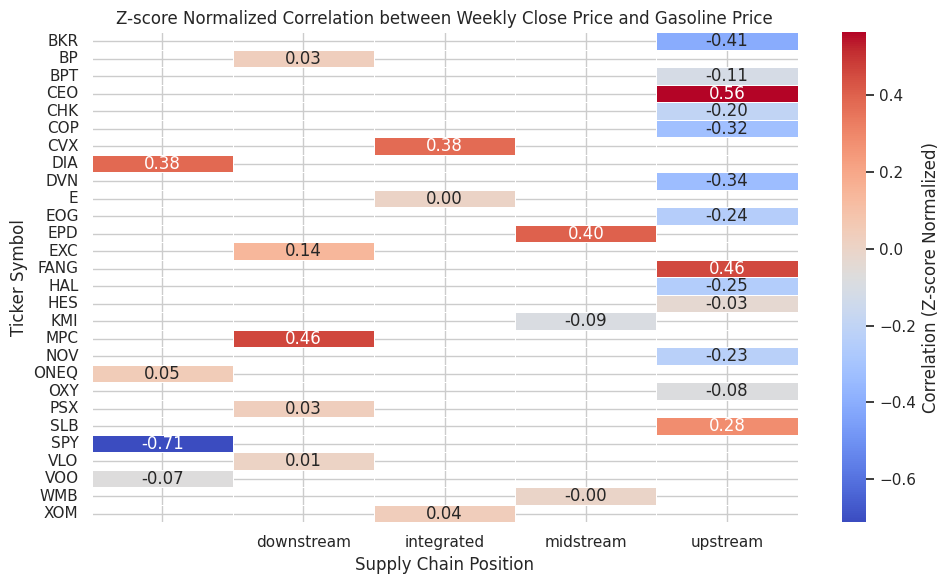

In [26]:
heatmap_df = correlation_results.pivot_table(
    index='Ticker_Symbol',
    columns='Supply_Chain_Position',
    values='Zscore_Correlation',
    aggfunc='first'
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_df,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation (Z-score Normalized)'}
)
plt.title('Z-score Normalized Correlation between Weekly Close Price and Gasoline Price')
plt.xlabel('Supply Chain Position')
plt.ylabel('Ticker Symbol')
plt.tight_layout()
plt.show()

By normalizing both gasoline prices and stock close prices with Z-score, we aim to remove the scale effects and focus on co-movement patterns. However, the heatmap reveals limited correlation between gasoline prices and most energy companies' stock performance. This suggests that additional macroeconomic variables or firm-specific events may be more dominant in driving stock behavior across the supply chain.

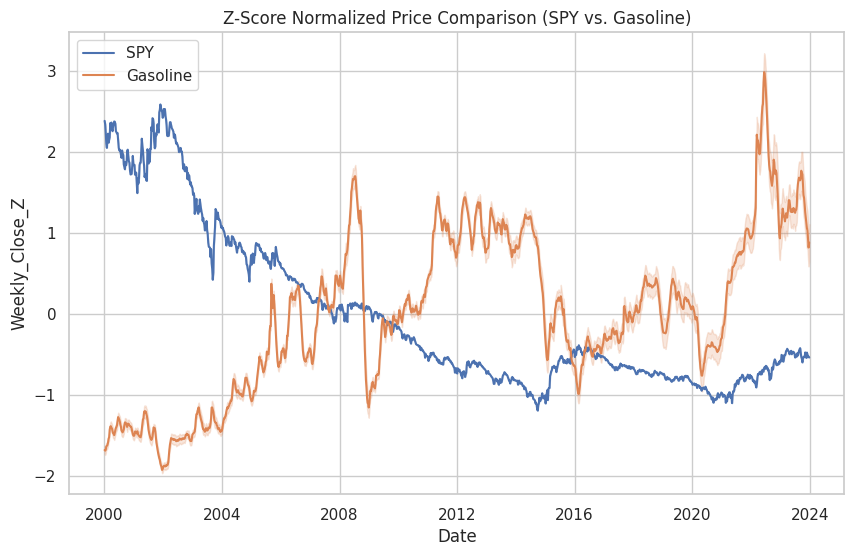

In [28]:
sns.lineplot(data=normalized_df[normalized_df['Ticker_Symbol'] == 'SPY'], x='Date', y='Weekly_Close_Z', label='SPY')
sns.lineplot(data=normalized_df[normalized_df['Ticker_Symbol'] == 'SPY'], x='Date', y='Price_Z', label='Gasoline')
plt.title('Z-Score Normalized Price Comparison (SPY vs. Gasoline)')
plt.show()

In [39]:
stocks = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/all_stocks_and_etfs.csv', parse_dates=['Date-Time'])
display(stocks.head())
display(stocks.tail())

# 1. Stocks data preparation
# Rename and sort
stocks.rename(columns={'Date-Time': 'Date'}, inplace=True)
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.sort_values(['Ticker_Symbol', 'Date'], inplace=True)

# Fill missing values by interpolating within each stock
stocks[['Close', 'High', 'Low']] = stocks.groupby('Ticker_Symbol')[['Close', 'High', 'Low']].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

# I. Calculate daily log returns
stocks['Daily_Log_Return'] = stocks.groupby('Ticker_Symbol')['Close'].transform(
    lambda x: np.log(x / x.shift(1))
)

# II. Calculate daily change percentage
stocks['Daily_Pct_Return'] = stocks.groupby('Ticker_Symbol')['Close'].transform(
    lambda x: (x - x.shift(1)) / x.shift(1)
)

# III. Calculate daily high-low volatility
stocks['Daily_High_Low'] = stocks['High'] - stocks['Low']

# IV. Rolling window volatility (e.g., n=5)
window_size = 5
stocks['Rolling_Log_Return_Volatility'] = stocks.groupby('Ticker_Symbol')['Daily_Log_Return'].transform(
    lambda r: r.rolling(window=window_size).std()
)

stocks.to_csv('all_stocks_and_etfs_daily.csv', index=False)

display(stocks.head())
display(stocks.tail())

Date-Time   Open     High      Low  Close    Volume Ticker_Symbol
0 2024-01-25  37.08  37.2481  35.9997  37.00  11492073           HAL
1 2024-01-24  35.68  36.9500  35.4838  36.83  14397273           HAL
2 2024-01-23  34.48  35.6900  33.9400  35.30  15096866           HAL
3 2024-01-22  33.88  34.6500  33.7750  34.43  11147116           HAL
4 2024-01-19  33.43  33.9800  33.3200  33.97   8908991           HAL

Date-Time      Open      High       Low     Close   Volume  \
144553 1999-11-05  138.6250  139.1093  136.7812  137.8750  7431500   
144554 1999-11-04  136.7500  137.3593  135.7656  136.5312  7907500   
144555 1999-11-03  136.0000  136.3750  135.1250  135.5000  7222300   
144556 1999-11-02  135.9687  137.2500  134.5937  134.5937  6516900   
144557 1999-11-01  136.5000  137.0000  135.5625  135.5625  4006500   

       Ticker_Symbol  
144553           SPY  
144554           SPY  
144555           SPY  
144556           SPY  
144557           SPY

Date   Open   High    Low  Close   Volume Ticker_Symbol  \
28876 2017-07-05  40.80  40.82  37.25  37.25  5883326           BKR   
28875 2017-07-06  38.09  38.09  36.52  37.01  5088097           BKR   
28874 2017-07-07  38.14  38.59  36.12  37.91  6014535           BKR   
28873 2017-07-10  37.63  38.17  36.80  37.23  4721508           BKR   
28872 2017-07-11  37.31  37.78  36.89  37.35  2791176           BKR   

       Daily_Log_Return  Daily_Pct_Return  Daily_High_Low  \
28876               NaN               NaN            3.57   
28875         -0.006464         -0.006443            1.57   
28874          0.024027          0.024318            2.47   
28873         -0.018100         -0.017937            1.37   
28872          0.003218          0.003223            0.89   

       Rolling_Log_Return_Volatility  
28876                            NaN  
28875                            NaN  
28874                            NaN  
28873                            NaN  
28872                            NaN

Date    Open      High     Low   Close    Volume Ticker_Symbol  \
93891 2024-01-19   96.72   97.0156  96.410   96.95  20088432           XOM   
93890 2024-01-22   96.70   97.0950  95.770   96.82  19955946           XOM   
93889 2024-01-23   96.81   98.5000  96.730   97.91  15863433           XOM   
93888 2024-01-24   98.32   99.6500  97.740   99.60  17114423           XOM   
93887 2024-01-25  100.31  102.1800  99.615  102.13  22089510           XOM   

       Daily_Log_Return  Daily_Pct_Return  Daily_High_Low  \
93891          0.001548          0.001550          0.6056   
93890         -0.001342         -0.001341          1.3250   
93889          0.011195          0.011258          1.7700   
93888          0.017113          0.017261          1.9100   
93887          0.025084          0.025402          2.5650   

       Rolling_Log_Return_Volatility  
93891                       0.013100  
93890                       0.009766  
93889                       0.006804  
93888                       0.008422  
93887                       0.010921

In [42]:
commodities = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/all_commodities.csv', parse_dates=['Date_Time'])
commodities = commodities[commodities['Commodity_Simple'] == 'BRENT'].copy()
commodities.rename(columns={'Date_Time': 'Date', 'Value': 'Brent_Price'}, inplace=True)
commodities.sort_values('Date', inplace=True)

commodities['Brent_Log_Return'] = np.log(commodities['Brent_Price'] / commodities['Brent_Price'].shift(1))
commodities['Brent_Zscore'] = (commodities['Brent_Price'] - commodities['Brent_Price'].mean()) / commodities['Brent_Price'].std()

merged = pd.merge(stocks, commodities[['Date', 'Brent_Price', 'Brent_Log_Return', 'Brent_Zscore']], on='Date', how='inner')

results = []
for ticker, group in merged.groupby('Ticker_Symbol'):
    corr_price = group['Close'].corr(group['Brent_Price'])
    corr_log = group['Daily_Log_Return'].corr(group['Brent_Log_Return'])
    corr_pct = group['Daily_Pct_Return'].corr(group['Brent_Log_Return'])
    corr_z = group['Close'].corr(group['Brent_Zscore'])
    corr_vol = group['Daily_High_Low'].corr(group['Brent_Log_Return'])
    corr_r_vol = group['Rolling_Log_Return_Volatility'].corr(group['Brent_Log_Return'])
    corr_r_vol_z = group['Rolling_Log_Return_Volatility'].corr(group['Brent_Zscore'])


    results.append({
        'Ticker_Symbol': ticker,
        'Corr_Close_vs_Brent': corr_price,
        'Corr_Log_vs_Brent': corr_log,
        'Corr_Pct_vs_Brent': corr_pct,
        'Corr_Close_vs_Brent_Zscore': corr_z,
        'Corr_Vol_vs_Brent': corr_vol,
        'Corr_R_Vol_vs_Brent': corr_r_vol,
        'Corr_R_Vol_vs_Brent_Zscore': corr_r_vol_z,
    })

correlation_df = pd.DataFrame(results)
display(correlation_df)


Ticker_Symbol  Corr_Close_vs_Brent  Corr_Log_vs_Brent  Corr_Pct_vs_Brent  \
0            BKR             0.622387           0.381018           0.374864   
1             BP             0.033366           0.354796           0.352130   
2            BPT             0.633818           0.299339           0.297053   
3            CEO             0.814832           0.285128           0.282576   
4            CHK             0.646679           0.349861           0.348877   
5            COP             0.483111           0.361314           0.373816   
6            CVX             0.486073           0.314050           0.325377   
7            DIA             0.233323           0.167257           0.164470   
8            DVN             0.516266           0.363857           0.369667   
9              E            -0.235877           0.274595           0.296988   
10           EOG             0.828523           0.334284           0.347734   
11           EPD             0.555720           0.213818           0.228320   
12           EXC            -0.085422           0.098629           0.103557   
13          FANG             0.083849           0.413110           0.408640   
14           HAL             0.356493           0.346222           0.351528   
15           HES             0.331194           0.328028           0.354324   
16           KMI             0.502006           0.340325           0.336577   
17           MPC             0.330428           0.307619           0.317866   
18           NOV             0.600076           0.324163           0.324366   
19          ONEQ            -0.298078           0.061535           0.118462   
20           OXY             0.727900           0.361924           0.368178   
21           PSX            -0.141349           0.362175           0.359735   
22           SLB             0.354427           0.350384           0.358289   
23           SPY             0.207121           0.174831           0.172397   
24           VLO             0.105317           0.247542           0.257165   
25           VOO            -0.351948           0.171434           0.132029   
26           WMB             0.409746           0.207335           0.206459   
27           XOM             0.591772           0.285644           0.299494   

    Corr_Close_vs_Brent_Zscore  Corr_Vol_vs_Brent  Corr_R_Vol_vs_Brent  \
0                     0.622387          -0.060750            -0.094002   
1                     0.033366          -0.059690            -0.043171   
2                     0.633818          -0.067089            -0.013583   
3                     0.814832          -0.041472            -0.016162   
4                     0.646679          -0.081184            -0.036033   
5                     0.483111          -0.067652            -0.042069   
6                     0.486073          -0.100564            -0.048675   
7                     0.233323          -0.075398            -0.076489   
8                     0.516266          -0.070745            -0.036954   
9                    -0.235877          -0.056843            -0.041685   
10                    0.828523          -0.071894            -0.038531   
11                    0.555720          -0.118783            -0.040694   
12                   -0.085422          -0.059934            -0.031120   
13                    0.083849          -0.039304            -0.044145   
14                    0.356493          -0.053726            -0.048080   
15                    0.331194          -0.040285            -0.043973   
16                    0.502006          -0.088236            -0.041613   
17                    0.330428          -0.059994            -0.047578   
18                    0.600076          -0.044123            -0.054137   
19                   -0.298078          -0.081648             0.000072   
20                    0.727900          -0.067536            -0.061332   
21                   -0.141349          -0.096825            -0.056318   
22       

In [43]:
# prompt: DataFrame correlation_df: heatmap

import altair as alt

# Melt the dataframe to long format for plotting
melted_df = correlation_df.melt('Ticker_Symbol', var_name='CorrelationType', value_name='Correlation')

# Create the heatmap
chart = alt.Chart(melted_df).mark_rect().encode(
    # Map 'Ticker_Symbol' to the x-axis
    x=alt.X('Ticker_Symbol:O', axis=None),
    # Map 'CorrelationType' to the y-axis
    y=alt.Y('CorrelationType:O', title='Correlation Type'),
    # Map 'Correlation' to color intensity
    color=alt.Color('Correlation:Q', title='Correlation'),
    # Add tooltips to show details on hover
    tooltip=['Ticker_Symbol', 'CorrelationType', 'Correlation']
).properties(
    # Set the title of the chart
    title='Correlation Heatmap'
)

# Display the chart
chart

alt.Chart(...)

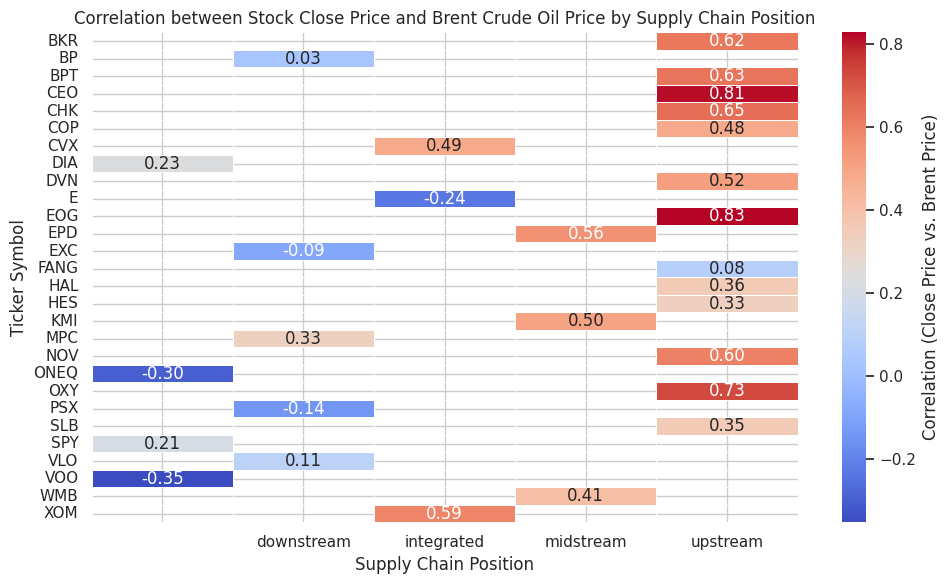

In [44]:
# prompt: use Corr_Close_vs_Brent to draw heatmap grouped by Supply_Chain_Position

# Add supply chain position
correlation_df['Supply_Chain_Position'] = correlation_df['Ticker_Symbol'].map(supply_chain_map)

heatmap_brent_data = correlation_df.pivot_table(
    index='Ticker_Symbol',
    columns='Supply_Chain_Position',
    values='Corr_Close_vs_Brent',
    aggfunc='first'
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_brent_data,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation (Close Price vs. Brent Price)'}
)
plt.title('Correlation between Stock Close Price and Brent Crude Oil Price by Supply Chain Position')
plt.xlabel('Supply Chain Position')
plt.ylabel('Ticker Symbol')
plt.tight_layout()
plt.show()

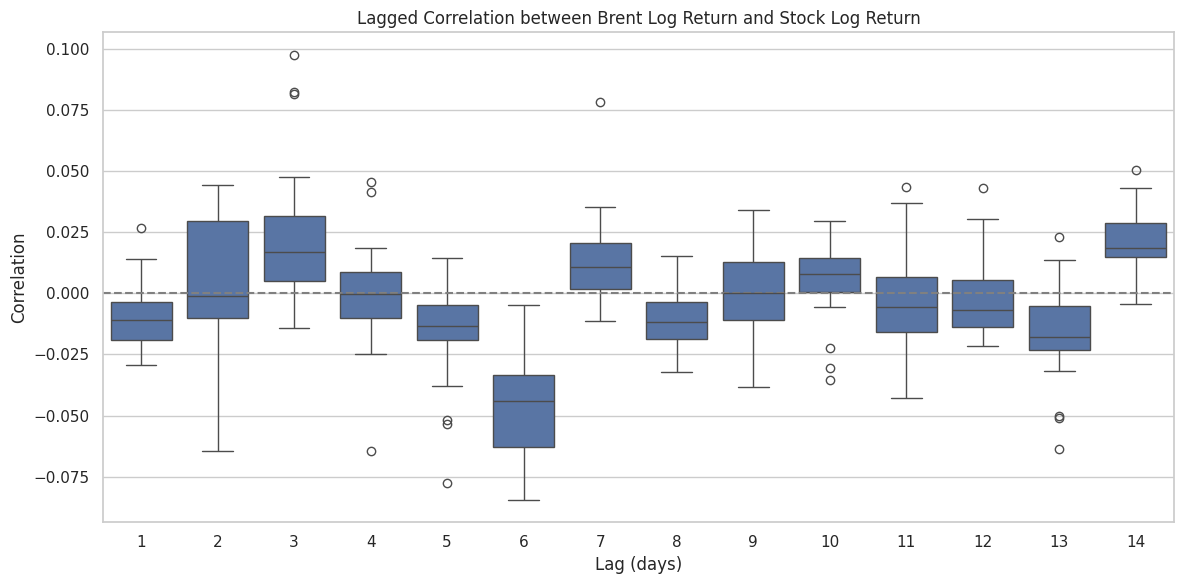

In [46]:
import pandas as pd
import numpy as np

commodities = pd.read_csv('/content/drive/MyDrive/2025-citadal-datathon/datathon_data/all_commodities.csv', parse_dates=['Date_Time'])
commodities = commodities[commodities['Commodity_Simple'] == 'BRENT'].copy()
commodities.rename(columns={'Date_Time': 'Date', 'Value': 'Brent_Price'}, inplace=True)
commodities.sort_values('Date', inplace=True)
commodities['Brent_Log_Return'] = np.log(commodities['Brent_Price'] / commodities['Brent_Price'].shift(1))

merged = pd.merge(stocks, commodities[['Date', 'Brent_Log_Return']], on='Date', how='inner')

# lagged Brent returns
max_lag = 14
for lag in range(1, max_lag + 1):
    merged[f'Brent_Log_Return_Lag_{lag}'] = merged.groupby('Ticker_Symbol')['Brent_Log_Return'].shift(lag)

# lagged correlation
lag_corr_results = []
for ticker, group in merged.groupby('Ticker_Symbol'):
    for lag in range(1, max_lag + 1):
        lagged_corr = group['Daily_Log_Return'].corr(group[f'Brent_Log_Return_Lag_{lag}'])
        lag_corr_results.append({
            'Ticker_Symbol': ticker,
            'Lag': lag,
            'Lagged_Corr_Brent_Log_Return': lagged_corr
        })

lag_corr_df = pd.DataFrame(lag_corr_results)

plt.figure(figsize=(12, 6))
sns.boxplot(data=lag_corr_df, x='Lag', y='Lagged_Corr_Brent_Log_Return')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Lagged Correlation between Brent Log Return and Stock Log Return')
plt.ylabel('Correlation')
plt.xlabel('Lag (days)')
plt.tight_layout()
plt.show()

In [ ]:
# 1. Stocks data preparation
# Rename and sort
stocks.rename(columns={'Date-Time': 'Date'}, inplace=True)
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.sort_values(['Ticker_Symbol', 'Date'], inplace=True)

# Fill missing values by interpolating within each stock
stocks[['Close', 'High', 'Low']] = stocks.groupby('Ticker_Symbol')[['Close', 'High', 'Low']].transform(
    lambda x: x.interpolate(method='linear', limit_direction='both')
)

# I. Calculate daily log returns
stocks['Daily_Log_Return'] = stocks.groupby('Ticker_Symbol')['Close'].transform(
    lambda x: np.log(x / x.shift(1))
)

# II. Calculate daily change percentage
stocks['Daily_Pct_Return'] = stocks.groupby('Ticker_Symbol')['Close'].transform(
    lambda x: (x - x.shift(1)) / x.shift(1)
)

# III. Calculate daily high-low volatility
stocks['Daily_High_Low'] = stocks['High'] - stocks['Low']

# IV. Rolling window volatility (e.g., n=5)
window_size = 5
stocks['Rolling_Log_Return_Volatility'] = stocks.groupby('Ticker_Symbol')['Daily_Log_Return'].transform(
    lambda r: r.rolling(window=window_size).std()
)

display(stocks.head())
display(stocks.tail())

Date   Open   High    Low  Close   Volume Ticker_Symbol  \
28876 2017-07-05  40.80  40.82  37.25  37.25  5883326           BKR   
28875 2017-07-06  38.09  38.09  36.52  37.01  5088097           BKR   
28874 2017-07-07  38.14  38.59  36.12  37.91  6014535           BKR   
28873 2017-07-10  37.63  38.17  36.80  37.23  4721508           BKR   
28872 2017-07-11  37.31  37.78  36.89  37.35  2791176           BKR   

       Daily_Log_Return  Daily_Pct_Return  Daily_High_Low  
28876               NaN               NaN            3.57  
28875         -0.006464         -0.006443            1.57  
28874          0.024027          0.024318            2.47  
28873         -0.018100         -0.017937            1.37  
28872          0.003218          0.003223            0.89

Date    Open      High     Low   Close    Volume Ticker_Symbol  \
93891 2024-01-19   96.72   97.0156  96.410   96.95  20088432           XOM   
93890 2024-01-22   96.70   97.0950  95.770   96.82  19955946           XOM   
93889 2024-01-23   96.81   98.5000  96.730   97.91  15863433           XOM   
93888 2024-01-24   98.32   99.6500  97.740   99.60  17114423           XOM   
93887 2024-01-25  100.31  102.1800  99.615  102.13  22089510           XOM   

       Daily_Log_Return  Daily_Pct_Return  Daily_High_Low  
93891          0.001548          0.001550          0.6056  
93890         -0.001342         -0.001341          1.3250  
93889          0.011195          0.011258          1.7700  
93888          0.017113          0.017261          1.9100  
93887          0.025084          0.025402          2.5650

In [ ]:
# 2. Weekly metrics calculation per ticker
weekly_metrics_list = []
for ticker, group in stocks.groupby('Ticker_Symbol'):
    group = group.set_index('Date')

    # 1. Weekly average of daily log returns
    weekly_avg_return = group['Daily_Log_Return'].resample('W-FRI').mean()

    # 2. Weekly average of daily percentage returns
    weekly_pct_return = group['Daily_Pct_Return'].resample('W-FRI').mean()

    # 3. Weekly average of daily volatility
    weekly_avg_volatility = group['Daily_High_Low'].resample('W-FRI').mean()

    # Combine into one DataFrame
    weekly_df = pd.DataFrame({
        'Weekly_Avg_Daily_Log_Return': weekly_avg_return,
        'Weekly_Avg_Pct_Return': weekly_pct_return,
        'Weekly_Avg_Volatility': weekly_avg_volatility
    }).reset_index()

    # Add ticker symbol
    weekly_df['Ticker_Symbol'] = ticker

    # Append to list
    weekly_metrics_list.append(weekly_df)

# Combine all stocks into a single DataFrame
weekly_stock_metrics = pd.concat(weekly_metrics_list, ignore_index=True)

display(weekly_stock_metrics.head())
display(weekly_stock_metrics.tail())

Date  Weekly_Avg_Daily_Log_Return  Weekly_Avg_Pct_Return  \
0 2017-07-07                     0.008781               0.008937   
1 2017-07-14                    -0.002976              -0.002903   
2 2017-07-21                    -0.018090              -0.017774   
3 2017-07-28                     0.016747               0.016936   
4 2017-08-04                    -0.010344              -0.010224   

   Weekly_Avg_Volatility Ticker_Symbol  
0               2.536667           BKR  
1               0.909000           BKR  
2               1.198000           BKR  
3               1.332860           BKR  
4               0.719000           BKR

Date  Weekly_Avg_Daily_Log_Return  Weekly_Avg_Pct_Return  \
29992 2023-12-29                    -0.004780              -0.004750   
29993 2024-01-05                     0.006540               0.006629   
29994 2024-01-12                    -0.005292              -0.005222   
29995 2024-01-19                    -0.007619              -0.007546   
29996 2024-01-26                     0.013013               0.013145   

       Weekly_Avg_Volatility Ticker_Symbol  
29992               1.145000           XOM  
29993               2.000925           XOM  
29994               1.659940           XOM  
29995               1.433900           XOM  
29996               1.892500           XOM

In [ ]:
# 3. Gasoline prices preparation (Weekly on Monday shifted to Friday)
gas_prices['Date'] = pd.to_datetime(gas_prices['Date']) + pd.Timedelta(days=4)
gas_prices.sort_values('Date', inplace=True)
# Filter only 'US'
gas_us = gas_prices[gas_prices['Geography'] == 'US'][['Date', 'Price']].copy()
gas_us.rename(columns={'Price': 'US_Gasoline_Price'}, inplace=True)
# Fill missing values by interpolating within the gas price
# gas_us['US_Gasoline_Price'] = gas_us['US_Gasoline_Price'].interpolate(method='linear', limit_direction='both')

display(gas_us.head())
display(gas_us.tail())
print("Before interpolation:", gas_us['US_Gasoline_Price'].isna().sum())
gas_us['US_Gasoline_Price'] = gas_us['US_Gasoline_Price'].interpolate(method='linear', limit_direction='both')
print("After interpolation:", gas_us['US_Gasoline_Price'].isna().sum())

display(gas_prices.head())
display(gas_prices.tail())

Date  US_Gasoline_Price
0     2000-01-07              1.260
8764  2000-01-07              1.507
10016 2000-01-07              1.457
11268 2000-01-07              1.301
12520 2000-01-07              1.365

Date  US_Gasoline_Price
12519 2023-12-29              3.094
13771 2023-12-29              3.522
16275 2023-12-29              3.914
17157 2023-12-29              3.914
15023 2023-12-29              3.238

Before interpolation: 0
After interpolation: 0


Date  Year                                               Type  \
0      2000-01-07  2000  Regular Conventional Retail Gasoline Prices  (...   
381232 2000-01-07  2000  Midgrade Conventional Retail Gasoline Prices  ...   
494196 2000-01-07  2000  All Grades All Formulations Retail Gasoline Pr...   
39324  2000-01-07  2000  Midgrade Reformulated Retail Gasoline Prices  ...   
255236 2000-01-07  2000    No 2 Diesel Retail Prices  (Dollars per Gallon)   

                                               Type_Clean                Unit  \
0             Regular Conventional Retail Gasoline Prices  Dollars per Gallon   
381232       Midgrade Conventional Retail Gasoline Prices  Dollars per Gallon   
494196  All Grades All Formulations Retail Gasoline Pr...  Dollars per Gallon   
39324        Midgrade Reformulated Retail Gasoline Prices  Dollars per Gallon   
255236                          No 2 Diesel Retail Prices  Dollars per Gallon   

                    Geography  Price      lat       lon  
0                          US  1.260  39.8283  -98.5795  
381232                Houston    NaN  29.7604  -95.3698  
494196                Seattle    NaN  47.6062 -122.3321  
39324   New England (PADD 1A)  1.434  43.9654  -71.6835  
255236               New York    NaN  43.0000  -75.0000

Date  Year                                               Type  \
348167 2023-12-29  2023  Midgrade Conventional Retail Gasoline Prices  ...   
349419 2023-12-29  2023  Midgrade Reformulated Retail Gasoline Prices  ...   
350671 2023-12-29  2023  Midgrade All Formulations Retail Gasoline Pric...   
384987 2023-12-29  2023  Midgrade All Formulations Retail Gasoline Pric...   
514739 2023-12-29  2023  No 2 Diesel Ultra Low Sulfur (0-15 ppm) Retail...   

                                               Type_Clean                Unit  \
348167       Midgrade Conventional Retail Gasoline Prices  Dollars per Gallon   
349419       Midgrade Reformulated Retail Gasoline Prices  Dollars per Gallon   
350671   Midgrade All Formulations Retail Gasoline Prices  Dollars per Gallon   
384987   Midgrade All Formulations Retail Gasoline Prices  Dollars per Gallon   
514739  No 2 Diesel Ultra Low Sulfur (0-15 ppm) Retail...  Dollars per Gallon   

                                    Geography  Price      lat       lon  
348167                              Cleveland  3.372  41.4993  -81.6944  
349419                              Cleveland    NaN  41.4993  -81.6944  
350671                              Cleveland  3.372  41.4993  -81.6944  
384987                                Houston  3.170  29.7604  -95.3698  
514739  West Coast (PADD 5) Except California  4.169  45.0000 -120.0000

In [ ]:
# 4. Merge the dataset

weekly_stock_metrics['Supply_Chain_Position'] = weekly_stock_metrics['Ticker_Symbol'].map(supply_chain_map)
weekly_stock_metrics = weekly_stock_metrics[
    weekly_stock_metrics['Supply_Chain_Position'].isin(['upstream', 'midstream', 'downstream', 'integrated'])
]

display(weekly_stock_metrics.head())
display(weekly_stock_metrics.tail())


merged_data_list = []

for ticker, group in weekly_stock_metrics.groupby('Ticker_Symbol'):
    min_date = group['Date'].min()
    group = group.sort_values('Date')

    gas_sub = gas_us[gas_us['Date'] >= min_date].copy().sort_values('Date')

    print(f"Ticker: {ticker}")
    print("Group date range:", group['Date'].min(), "to", group['Date'].max())
    print("Gas price date range:", gas_sub['Date'].min(), "to", gas_sub['Date'].max())
    print("Overlapping dates:", len(set(group['Date']).intersection(set(gas_sub['Date']))))

    merged = pd.merge_asof(
        group,
        gas_sub,
        on='Date',
        direction='nearest',
        tolerance=pd.Timedelta(days=2)
    )

    print("Merged rows:", len(merged))
    merged_data_list.append(merged)


merged_data = pd.concat(merged_data_list, ignore_index=True)

display(merged_data.head())
display(merged_data.tail())

Date  Weekly_Avg_Daily_Log_Return  Weekly_Avg_Pct_Return  \
0 2017-07-07                     0.008781               0.008937   
1 2017-07-14                    -0.002976              -0.002903   
2 2017-07-21                    -0.018090              -0.017774   
3 2017-07-28                     0.016747               0.016936   
4 2017-08-04                    -0.010344              -0.010224   

   Weekly_Avg_Volatility Ticker_Symbol Supply_Chain_Position  
0               2.536667           BKR              upstream  
1               0.909000           BKR              upstream  
2               1.198000           BKR              upstream  
3               1.332860           BKR              upstream  
4               0.719000           BKR              upstream

Date  Weekly_Avg_Daily_Log_Return  Weekly_Avg_Pct_Return  \
29992 2023-12-29                    -0.004780              -0.004750   
29993 2024-01-05                     0.006540               0.006629   
29994 2024-01-12                    -0.005292              -0.005222   
29995 2024-01-19                    -0.007619              -0.007546   
29996 2024-01-26                     0.013013               0.013145   

       Weekly_Avg_Volatility Ticker_Symbol Supply_Chain_Position  
29992               1.145000           XOM            integrated  
29993               2.000925           XOM            integrated  
29994               1.659940           XOM            integrated  
29995               1.433900           XOM            integrated  
29996               1.892500           XOM            integrated

Ticker: BKR
Group date range: 2017-07-07 00:00:00 to 2024-01-26 00:00:00
Gas price date range: 2017-07-07 00:00:00 to 2023-12-29 00:00:00
Overlapping dates: 339
Merged rows: 343
Ticker: BP
Group date range: 1999-11-05 00:00:00 to 2024-01-26 00:00:00
Gas price date range: 2000-01-07 00:00:00 to 2023-12-29 00:00:00
Overlapping dates: 1252
Merged rows: 1265
Ticker: BPT
Group date range: 1999-11-05 00:00:00 to 2024-01-26 00:00:00
Gas price date range: 2000-01-07 00:00:00 to 2023-12-29 00:00:00
Overlapping dates: 1252
Merged rows: 1265
Ticker: CEO
Group date range: 2001-03-02 00:00:00 to 2023-05-12 00:00:00
Gas price date range: 2001-03-02 00:00:00 to 2023-12-29 00:00:00
Overlapping dates: 1159
Merged rows: 1159
Ticker: CHK
Group date range: 2021-02-12 00:00:00 to 2024-01-26 00:00:00
Gas price date range: 2021-02-12 00:00:00 to 2023-12-29 00:00:00
Overlapping dates: 151
Merged rows: 155
Ticker: COP
Group date range: 1999-11-05 00:00:00 to 2024-01-26 00:00:00
Gas price date range: 2000-01-07

Date  Weekly_Avg_Daily_Log_Return  Weekly_Avg_Pct_Return  \
0 2017-07-07                     0.008781               0.008937   
1 2017-07-14                    -0.002976              -0.002903   
2 2017-07-21                    -0.018090              -0.017774   
3 2017-07-28                     0.016747               0.016936   
4 2017-08-04                    -0.010344              -0.010224   

   Weekly_Avg_Volatility Ticker_Symbol Supply_Chain_Position  \
0               2.536667           BKR              upstream   
1               0.909000           BKR              upstream   
2               1.198000           BKR              upstream   
3               1.332860           BKR              upstream   
4               0.719000           BKR              upstream   

   US_Gasoline_Price  
0              2.472  
1              2.798  
2              2.303  
3              2.426  
4              2.526

Date  Weekly_Avg_Daily_Log_Return  Weekly_Avg_Pct_Return  \
25698 2023-12-29                    -0.004780              -0.004750   
25699 2024-01-05                     0.006540               0.006629   
25700 2024-01-12                    -0.005292              -0.005222   
25701 2024-01-19                    -0.007619              -0.007546   
25702 2024-01-26                     0.013013               0.013145   

       Weekly_Avg_Volatility Ticker_Symbol Supply_Chain_Position  \
25698               1.145000           XOM            integrated   
25699               2.000925           XOM            integrated   
25700               1.659940           XOM            integrated   
25701               1.433900           XOM            integrated   
25702               1.892500           XOM            integrated   

       US_Gasoline_Price  
25698              3.238  
25699                NaN  
25700                NaN  
25701                NaN  
25702                NaN

#### 5.a Calculate the Pearson Correlation

In [ ]:
results = []
for ticker, group in merged_data.groupby('Ticker_Symbol'):
    corr_return = group['Weekly_Avg_Daily_Log_Return'].corr(group['US_Gasoline_Price'])
    corr_pct_return = group['Weekly_Avg_Pct_Return'].corr(group['US_Gasoline_Price'])
    corr_vol = group['Weekly_Avg_Volatility'].corr(group['US_Gasoline_Price'])
    position = group['Supply_Chain_Position'].iloc[0]

    results.append({
        'Ticker_Symbol': ticker,
        'Supply_Chain_Position': position,
        'Corr_Log_Return': corr_return,
        'Corr_Pct_Return': corr_return,
        'Corr_Volatility': corr_vol
    })

correlation_df = pd.DataFrame(results)

display(correlation_df)

Ticker_Symbol Supply_Chain_Position  Corr_Log_Return  Corr_Pct_Return  \
0            BKR              upstream        -0.061694        -0.061694   
1             BP            downstream        -0.019804        -0.019804   
2            BPT              upstream        -0.046292        -0.046292   
3            CEO              upstream        -0.082852        -0.082852   
4            CHK              upstream         0.004160         0.004160   
5            COP              upstream        -0.007973        -0.007973   
6            CVX            integrated        -0.002013        -0.002013   
7            DVN              upstream        -0.038566        -0.038566   
8              E            integrated        -0.038225        -0.038225   
9            EOG              upstream        -0.036411        -0.036411   
10           EPD             midstream        -0.024640        -0.024640   
11           EXC            downstream        -0.043718        -0.043718   
12          FANG              upstream        -0.032460        -0.032460   
13           HAL              upstream        -0.034183        -0.034183   
14           HES              upstream        -0.027280        -0.027280   
15           KMI             midstream         0.017509         0.017509   
16           MPC            downstream         0.002931         0.002931   
17           NOV              upstream        -0.046382        -0.046382   
18           OXY              upstream        -0.036826        -0.036826   
19           PSX            downstream         0.008289         0.008289   
20           SLB              upstream        -0.029915        -0.029915   
21           VLO            downstream        -0.035998        -0.035998   
22           WMB             midstream         0.009234         0.009234   
23           XOM            integrated         0.016165         0.016165   

    Corr_Volatility  
0          0.215470  
1         -0.132257  
2          0.310941  
3          0.259010  
4          0.522930  
5          0.320103  
6          0.313774  
7          0.192492  
8         -0.355298  
9          0.586695  
10         0.043428  
11        -0.164936  
12         0.298986  
13         0.063060  
14         0.360719  
15        -0.075681  
16         0.410347  
17         0.177467  
18         0.494174  
19         0.204158  
20         0.009185  
21         0.363164  
22        -0.078984  
23         0.264217

In [ ]:
filtered_df = correlation_df[correlation_df['Supply_Chain_Position'].isin(['upstream', 'midstream', 'downstream'])]

# Scatter plot
chart = alt.Chart(filtered_df).mark_circle().encode(
    x='Corr_Log_Return',
    y='Corr_Volatility',
    color='Supply_Chain_Position',
    tooltip=['Ticker_Symbol', 'Supply_Chain_Position', 'Corr_Log_Return', 'Corr_Volatility']
).properties(
    title='Correlation of Log Return and Volatility by Supply Chain Position'
).interactive()

chart

alt.Chart(...)

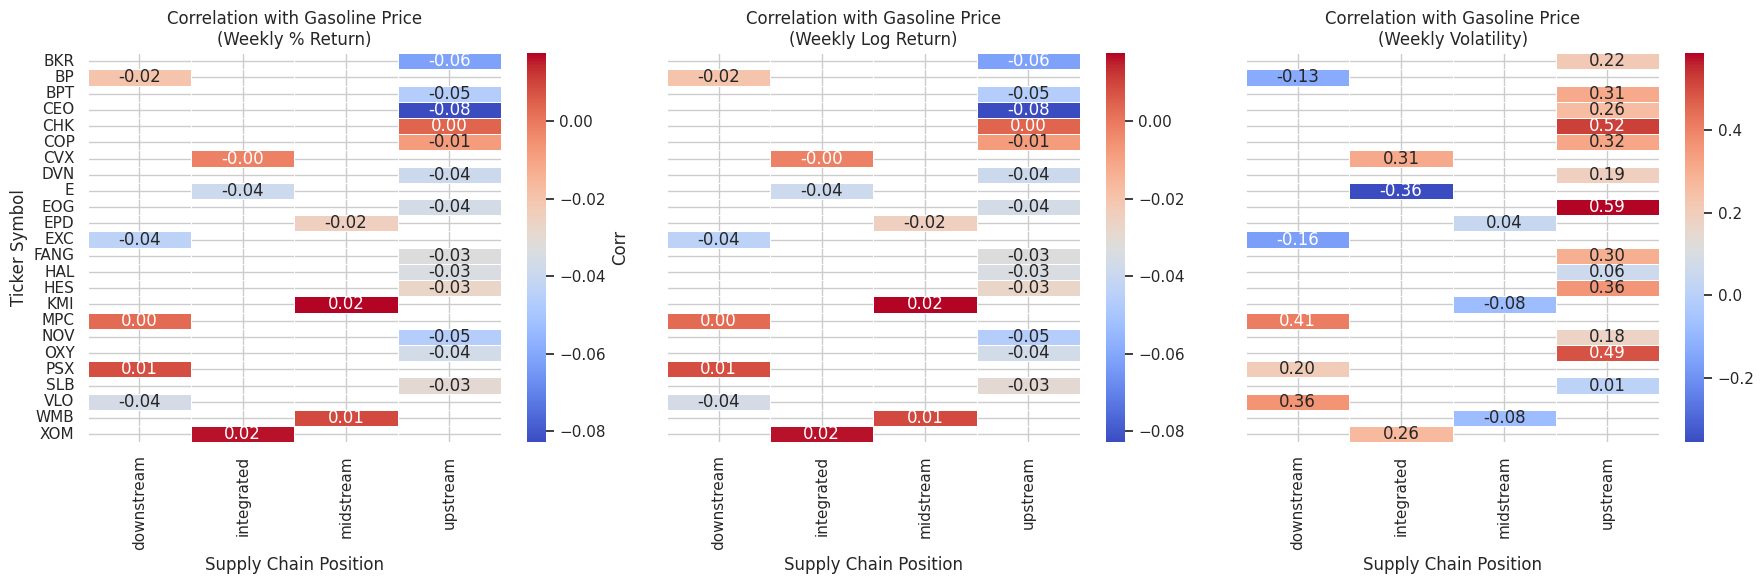

In [ ]:
correlation_targets = [
    ('Corr_Pct_Return', 'Weekly % Return'),
    ('Corr_Log_Return', 'Weekly Log Return'),
    ('Corr_Volatility', 'Weekly Volatility')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, (value_col, title) in zip(axes, correlation_targets):
    correlation_matrix = correlation_df.pivot(
        index='Ticker_Symbol',
        columns='Supply_Chain_Position',
        values=value_col
    )

    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        linewidths=0.5,
        cbar_kws={'label': 'Corr'} if title == 'Weekly % Return' else None,
        ax=ax
    )
    ax.set_title(f'Correlation with Gasoline Price\n({title})')
    ax.set_xlabel('Supply Chain Position')
    if ax == axes[0]:
        ax.set_ylabel('Ticker Symbol')
    else:
        ax.set_ylabel('')

plt.tight_layout()
plt.show()

<ipython-input-29-348f5e41e614>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-29-348f5e41e614>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-29-348f5e41e614>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




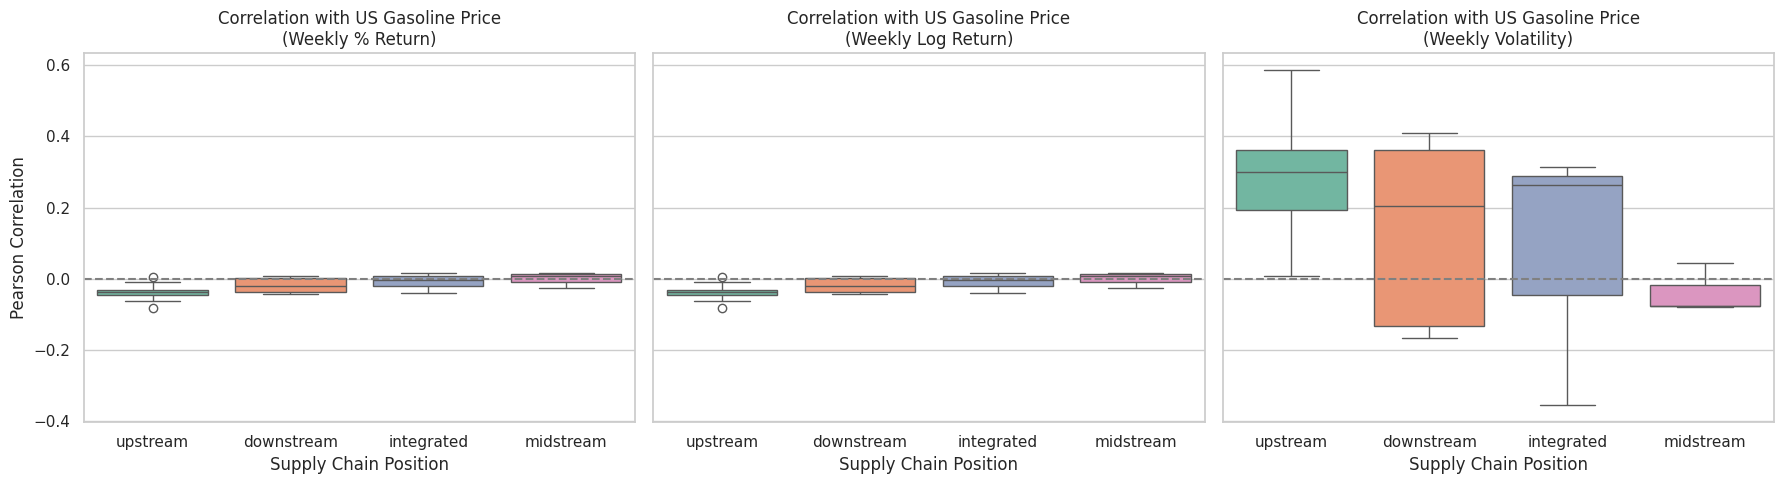

In [ ]:
correlation_targets = [
    ('Corr_Pct_Return', 'Weekly % Return'),
    ('Corr_Log_Return', 'Weekly Log Return'),
    ('Corr_Volatility', 'Weekly Volatility')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, (y_col, label) in zip(axes, correlation_targets):
    sns.boxplot(
        data=correlation_df,
        x='Supply_Chain_Position',
        y=y_col,
        palette='Set2',
        ax=ax
    )
    ax.set_title(f'Correlation with US Gasoline Price\n({label})')
    ax.set_xlabel('Supply Chain Position')
    if ax == axes[0]:
        ax.set_ylabel('Pearson Correlation')
    else:
        ax.set_ylabel('')
    ax.axhline(0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

📊 **Summary: Correlation Between Gasoline Prices and Stock Metrics**

Our heatmap visualizations depict the Pearson correlation between **weekly US gasoline prices** and three key stock metrics across 28 energy-related companies, grouped by their **supply chain position** (upstream, midstream, downstream, integrated):

1. **Weekly % Return**
2. **Weekly Log Return**
3. **Weekly Volatility**

**🔎 Key Findings**

* **Return-Based Correlations Are Weak Across All Streams:**

  * Both **% returns** and **log returns** show correlations close to **zero** for most companies.
  * This indicates **little to no immediate linear relationship** between weekly changes in gas prices and short-term stock performance.

* **Volatility Has Noticeably Higher Correlations:**

  * Many **upstream companies** (e.g., **EOG**, **OXY**, **DVN**) show **moderate positive correlations (0.3–0.5)** between **gasoline prices and stock volatility**.
  * This suggests gasoline price fluctuations might **increase risk perception or market activity**, especially in exploration and production segments.

* **Integrated and Midstream Stocks Show Mixed Results:**

  * Some integrated players like **XOM** show low but **positive correlations** across all metrics, reflecting **diversified resilience**.
  * Midstream firms (e.g., **KMI**, **WMB**) exhibit mild to neutral relationships.



>❓ for upstream firms, crude oil prices may be more directly linked to performance than gasoline?



#### 5.b Calculate the Spearman Correlation

In [ ]:
results = []
for ticker, group in merged_data.groupby('Ticker_Symbol'):
    corr_return = group['Weekly_Avg_Daily_Log_Return'].corr(group['US_Gasoline_Price'], method='spearman')
    corr_pct_return = group['Weekly_Avg_Pct_Return'].corr(group['US_Gasoline_Price'], method='spearman')
    corr_vol = group['Weekly_Avg_Volatility'].corr(group['US_Gasoline_Price'], method='spearman')
    position = group['Supply_Chain_Position'].iloc[0]

    results.append({
        'Ticker_Symbol': ticker,
        'Supply_Chain_Position': position,
        'Corr_Log_Return': corr_return,
        'Corr_Pct_Return': corr_return,
        'Corr_Volatility': corr_vol
    })

correlation_df = pd.DataFrame(results)
display(correlation_df)

Ticker_Symbol Supply_Chain_Position  Corr_Log_Return  Corr_Pct_Return  \
0            BKR              upstream        -0.046008        -0.046008   
1             BP            downstream        -0.029288        -0.029288   
2            BPT              upstream        -0.054786        -0.054786   
3            CEO              upstream        -0.071593        -0.071593   
4            CHK              upstream        -0.040788        -0.040788   
5            COP              upstream        -0.005107        -0.005107   
6            CVX            integrated        -0.006343        -0.006343   
7            DVN              upstream        -0.043898        -0.043898   
8              E            integrated        -0.052788        -0.052788   
9            EOG              upstream        -0.034042        -0.034042   
10           EPD             midstream        -0.036891        -0.036891   
11           EXC            downstream        -0.050005        -0.050005   
12          FANG              upstream        -0.033243        -0.033243   
13           HAL              upstream        -0.034663        -0.034663   
14           HES              upstream        -0.018917        -0.018917   
15           KMI             midstream         0.014649         0.014649   
16           MPC            downstream        -0.006935        -0.006935   
17           NOV              upstream        -0.038859        -0.038859   
18           OXY              upstream        -0.066857        -0.066857   
19           PSX            downstream         0.037217         0.037217   
20           SLB              upstream        -0.037845        -0.037845   
21           VLO            downstream        -0.052971        -0.052971   
22           WMB             midstream         0.015821         0.015821   
23           XOM            integrated        -0.008867        -0.008867   

    Corr_Volatility  
0          0.180562  
1         -0.208065  
2          0.354864  
3          0.294360  
4          0.466449  
5          0.168545  
6          0.256279  
7          0.092418  
8         -0.408625  
9          0.645017  
10         0.073503  
11        -0.310630  
12         0.177843  
13         0.117577  
14         0.274864  
15        -0.034421  
16         0.358448  
17         0.129753  
18         0.553606  
19         0.159260  
20        -0.024862  
21         0.228415  
22         0.018666  
23         0.273420

In [ ]:
filtered_df = correlation_df[correlation_df['Supply_Chain_Position'].isin(['upstream', 'midstream', 'downstream'])]

# scatter plot
chart = alt.Chart(filtered_df).mark_circle().encode(
    x='Corr_Log_Return',
    y='Corr_Volatility',
    color='Supply_Chain_Position',
    tooltip=['Ticker_Symbol', 'Supply_Chain_Position', 'Corr_Log_Return', 'Corr_Volatility']
).properties(
    title='Correlation of Log Return and Volatility by Supply Chain Position'
).interactive()

chart

alt.Chart(...)

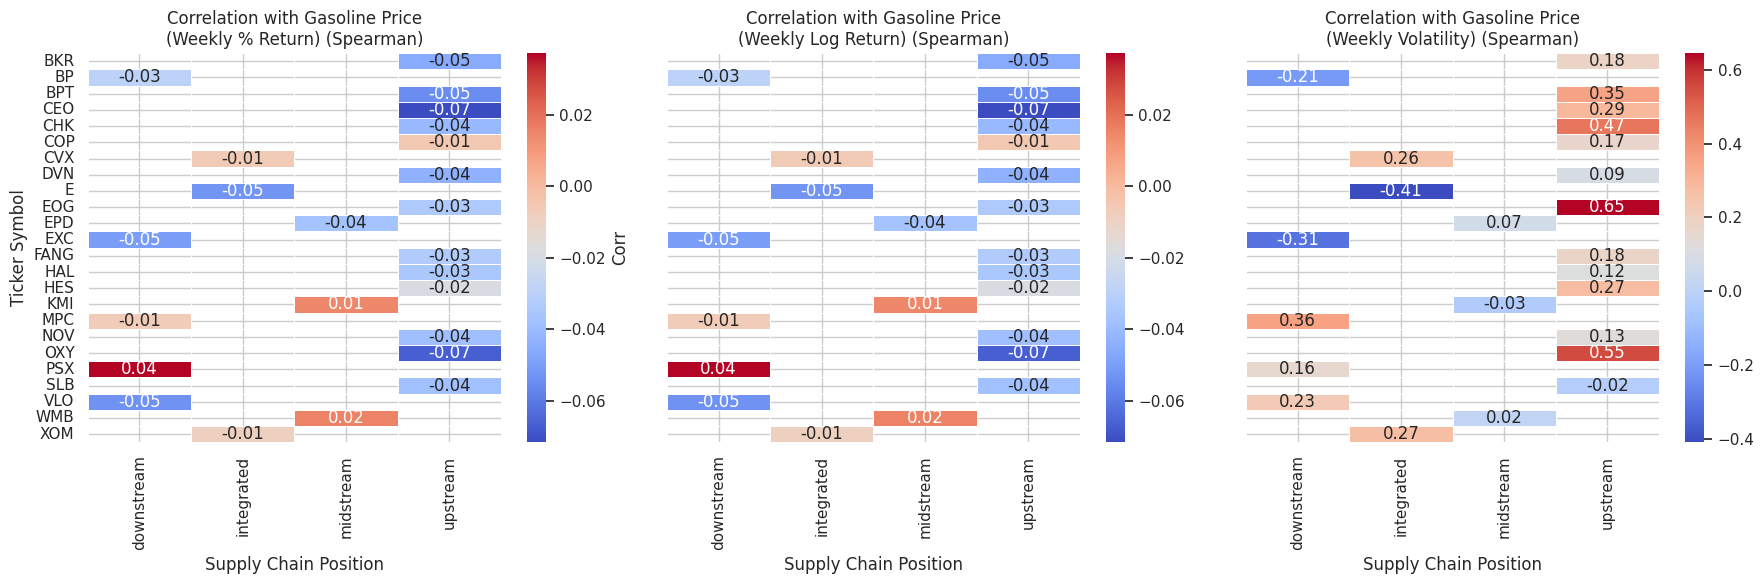

In [ ]:
correlation_targets = [
    ('Corr_Pct_Return', 'Weekly % Return'),
    ('Corr_Log_Return', 'Weekly Log Return'),
    ('Corr_Volatility', 'Weekly Volatility')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, (value_col, title) in zip(axes, correlation_targets):
    correlation_matrix = correlation_df.pivot(
        index='Ticker_Symbol',
        columns='Supply_Chain_Position',
        values=value_col
    )

    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        linewidths=0.5,
        cbar_kws={'label': 'Corr'} if title == 'Weekly % Return' else None,
        ax=ax
    )
    ax.set_title(f'Correlation with Gasoline Price\n({title}) (Spearman)')
    ax.set_xlabel('Supply Chain Position')
    if ax == axes[0]:
        ax.set_ylabel('Ticker Symbol')
    else:
        ax.set_ylabel('')

plt.tight_layout()
plt.show()

<ipython-input-33-893cc031a568>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-33-893cc031a568>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-33-893cc031a568>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




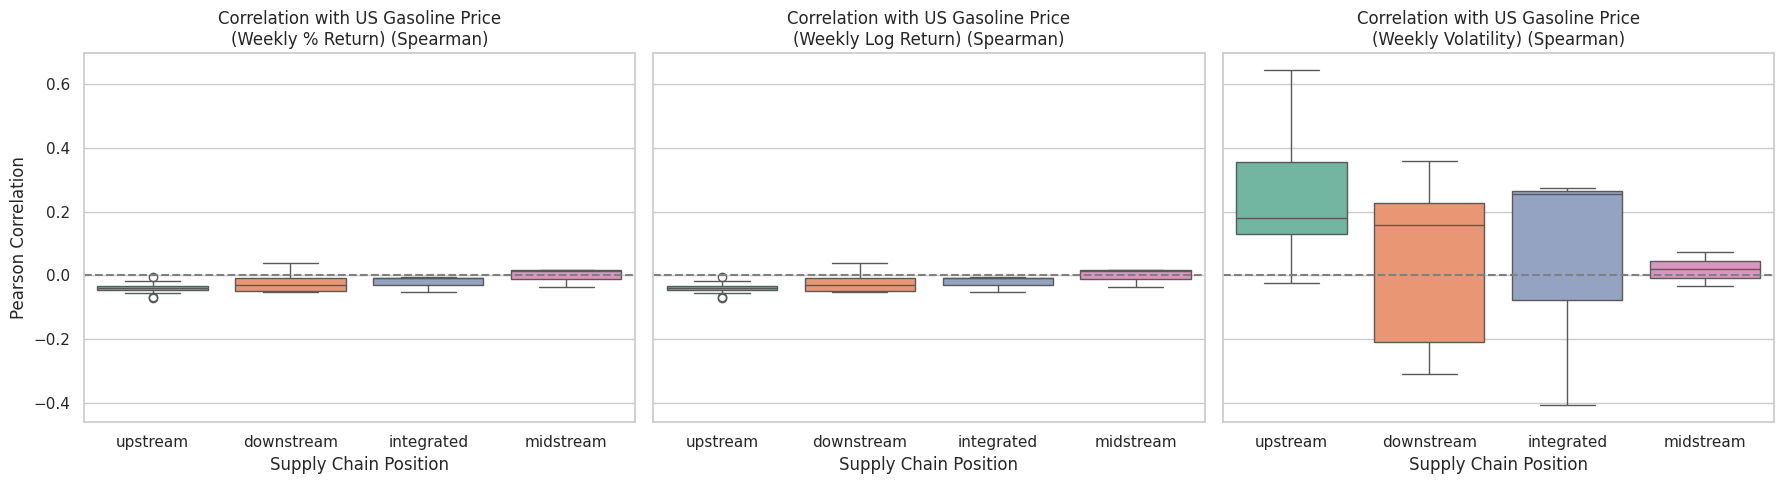

In [ ]:
correlation_targets = [
    ('Corr_Pct_Return', 'Weekly % Return'),
    ('Corr_Log_Return', 'Weekly Log Return'),
    ('Corr_Volatility', 'Weekly Volatility')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, (y_col, label) in zip(axes, correlation_targets):
    sns.boxplot(
        data=correlation_df,
        x='Supply_Chain_Position',
        y=y_col,
        palette='Set2',
        ax=ax
    )
    ax.set_title(f'Correlation with US Gasoline Price\n({label}) (Spearman)')
    ax.set_xlabel('Supply Chain Position')
    if ax == axes[0]:
        ax.set_ylabel('Pearson Correlation')
    else:
        ax.set_ylabel('')
    ax.axhline(0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

### 6. Lag correlation
Analyze whether gasoline price changes from prior weeks affect stock returns 1–6 weeks later.

For Weekly_Avg_Volatility

In [ ]:
for lag in range(1, 6):
    gas_us[f'US_Gasoline_Price_Lag_{lag}'] = gas_us['US_Gasoline_Price'].shift(lag)

In [ ]:
merged_lagged_list = []

for ticker, group in weekly_stock_metrics.groupby('Ticker_Symbol'):
    stock_min_date = group['Date'].min()
    gas_lagged_sub = gas_us[gas_us['Date'] >= stock_min_date]

    merged = pd.merge(group, gas_lagged_sub, on='Date', how='inner')
    merged_lagged_list.append(merged)

merged_lagged = pd.concat(merged_lagged_list, ignore_index=True)

In [ ]:
lagged_corr_results = []

for ticker, group in merged_lagged.groupby('Ticker_Symbol'):
    position = group['Supply_Chain_Position'].iloc[0]
    result = {'Ticker_Symbol': ticker, 'Supply_Chain_Position': position}

    for lag in range(1, 8):
        col_name = f'US_Gasoline_Price_Lag_{lag}'
        corr = group['Weekly_Avg_Volatility'].corr(group[col_name])
        result[f'Corr_Lag_{lag}'] = corr

    lagged_corr_results.append(result)

lagged_corr_df = pd.DataFrame(lagged_corr_results)
display(lagged_corr_df.head())

Ticker_Symbol Supply_Chain_Position  Corr_Lag_1  Corr_Lag_2  Corr_Lag_3  \
0           BKR              upstream    0.245499    0.246095    0.242990   
1            BP            downstream   -0.136464   -0.135385   -0.134401   
2           BPT              upstream    0.298604    0.298941    0.299085   
3           CEO              upstream    0.253941    0.254293    0.254335   
4           CHK              upstream    0.528188    0.529719    0.527439   

   Corr_Lag_4  Corr_Lag_5  Corr_Lag_6  Corr_Lag_7  
0    0.244372    0.243766    0.241984    0.240901  
1   -0.133411   -0.132346   -0.131511   -0.130581  
2    0.299353    0.299899    0.300060    0.300650  
3    0.254932    0.255623    0.256047    0.256438  
4    0.519934    0.517297    0.515663    0.513517

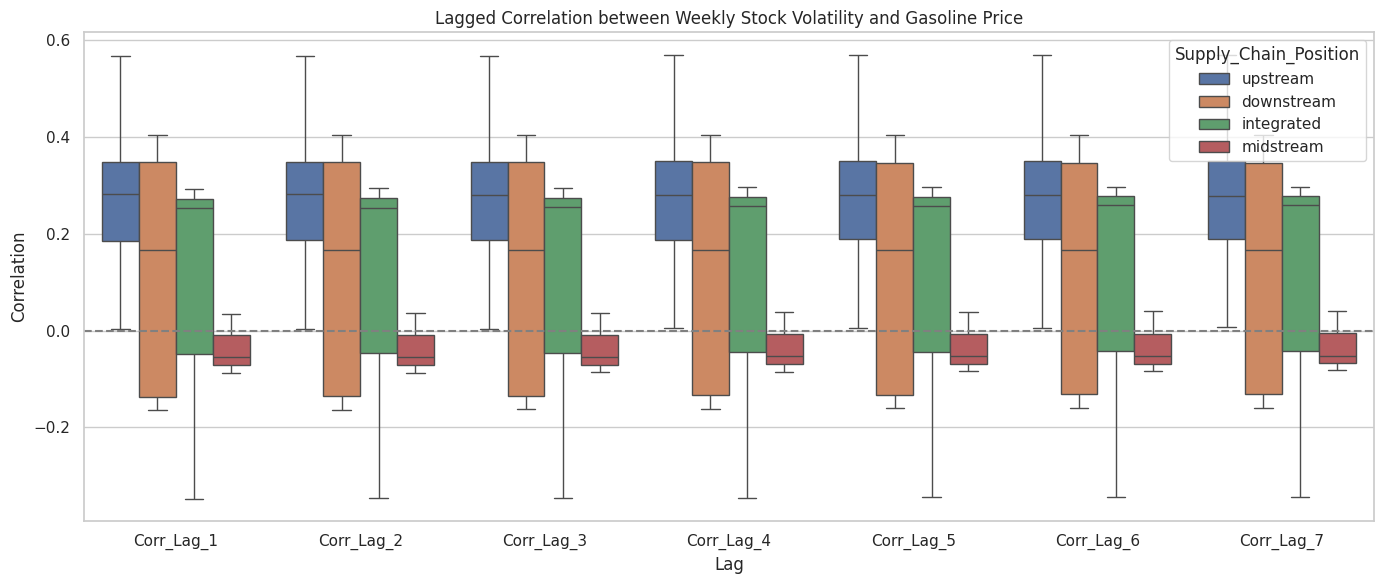

In [ ]:
melted = lagged_corr_df.melt(
    id_vars=['Ticker_Symbol', 'Supply_Chain_Position'],
    value_vars=[f'Corr_Lag_{i}' for i in range(1, 8)],
    var_name='Lag',
    value_name='Correlation'
)

plt.figure(figsize=(14, 6))
sns.boxplot(data=melted, x='Lag', y='Correlation', hue='Supply_Chain_Position')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Lagged Correlation between Weekly Stock Volatility and Gasoline Price')
plt.tight_layout()
plt.show()

Ticker_Symbol Supply_Chain_Position  Corr_Lag_1  Corr_Lag_2  Corr_Lag_3  \
0           BKR              upstream   -0.041762   -0.042729   -0.043753   
1            BP            downstream   -0.022729   -0.023078   -0.022598   
2           BPT              upstream   -0.030253   -0.030503   -0.030324   
3           CEO              upstream   -0.089182   -0.089110   -0.088716   
4           CHK              upstream    0.011961    0.008585    0.000372   

   Corr_Lag_4  Corr_Lag_5  Corr_Lag_6  Corr_Lag_7  
0   -0.046411   -0.043514   -0.045929   -0.046678  
1   -0.023311   -0.021994   -0.022228   -0.022276  
2   -0.030383   -0.031757   -0.031464   -0.031342  
3   -0.089213   -0.088285   -0.088524   -0.088656  
4   -0.003226    0.005143    0.005849    0.008090

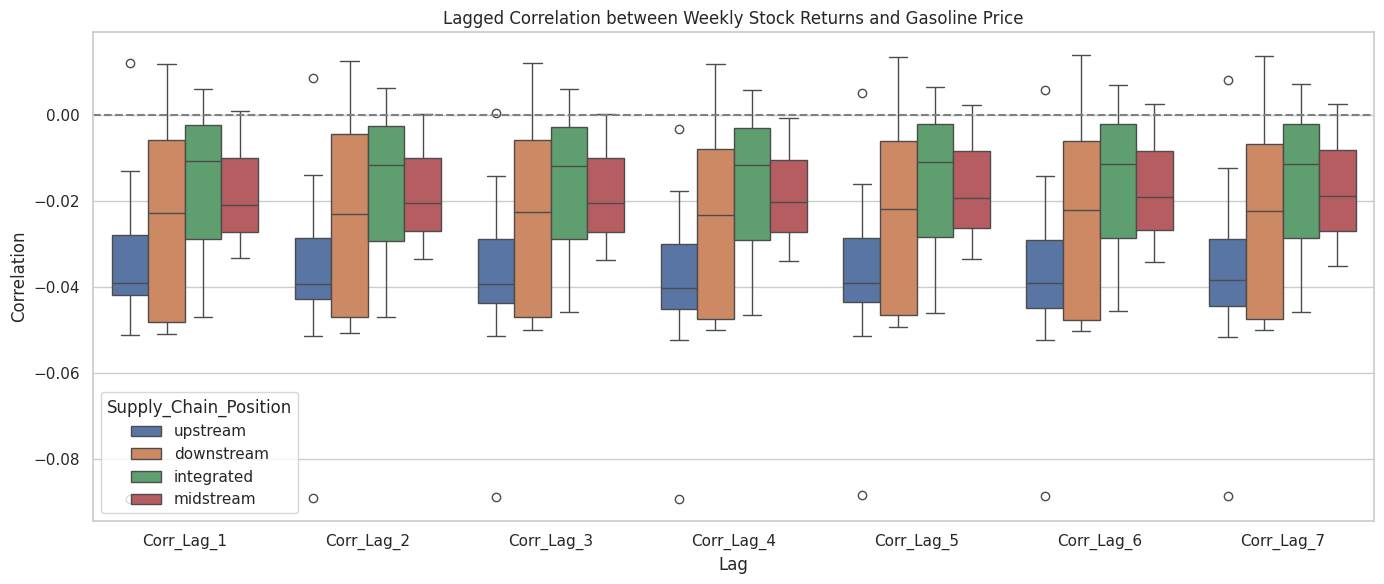

In [ ]:
for lag in range(1, 6):
    gas_us[f'US_Gasoline_Price_Lag_{lag}'] = gas_us['US_Gasoline_Price'].shift(lag)

merged_lagged_list = []

for ticker, group in weekly_stock_metrics.groupby('Ticker_Symbol'):
    stock_min_date = group['Date'].min()
    gas_lagged_sub = gas_us[gas_us['Date'] >= stock_min_date]

    merged = pd.merge(group, gas_lagged_sub, on='Date', how='inner')
    merged_lagged_list.append(merged)

merged_lagged = pd.concat(merged_lagged_list, ignore_index=True)

lagged_corr_results = []

for ticker, group in merged_lagged.groupby('Ticker_Symbol'):
    position = group['Supply_Chain_Position'].iloc[0]
    result = {'Ticker_Symbol': ticker, 'Supply_Chain_Position': position}

    for lag in range(1, 8):
        col_name = f'US_Gasoline_Price_Lag_{lag}'
        corr = group['Weekly_Avg_Pct_Return'].corr(group[col_name])
        result[f'Corr_Lag_{lag}'] = corr

    lagged_corr_results.append(result)

lagged_corr_df = pd.DataFrame(lagged_corr_results)
display(lagged_corr_df.head())

melted = lagged_corr_df.melt(
    id_vars=['Ticker_Symbol', 'Supply_Chain_Position'],
    value_vars=[f'Corr_Lag_{i}' for i in range(1, 8)],
    var_name='Lag',
    value_name='Correlation'
)

plt.figure(figsize=(14, 6))
sns.boxplot(data=melted, x='Lag', y='Correlation', hue='Supply_Chain_Position')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Lagged Correlation between Weekly Stock Returns and Gasoline Price')
plt.tight_layout()
plt.show()

Ticker_Symbol Supply_Chain_Position  Corr_Lag_1  Corr_Lag_2  Corr_Lag_3  \
0           BKR              upstream   -0.034897   -0.035931   -0.036945   
1            BP            downstream   -0.021532   -0.021955   -0.021559   
2           BPT              upstream   -0.038858   -0.039058   -0.038837   
3           CEO              upstream   -0.085599   -0.085594   -0.085258   
4           CHK              upstream    0.003740    0.000224   -0.007932   

   Corr_Lag_4  Corr_Lag_5  Corr_Lag_6  Corr_Lag_7  
0   -0.039660   -0.036845   -0.039301   -0.040072  
1   -0.022299   -0.021036   -0.021336   -0.021411  
2   -0.038958   -0.040331   -0.040026   -0.039924  
3   -0.085823   -0.084969   -0.085292   -0.085480  
4   -0.011242   -0.002811   -0.002116    0.000273

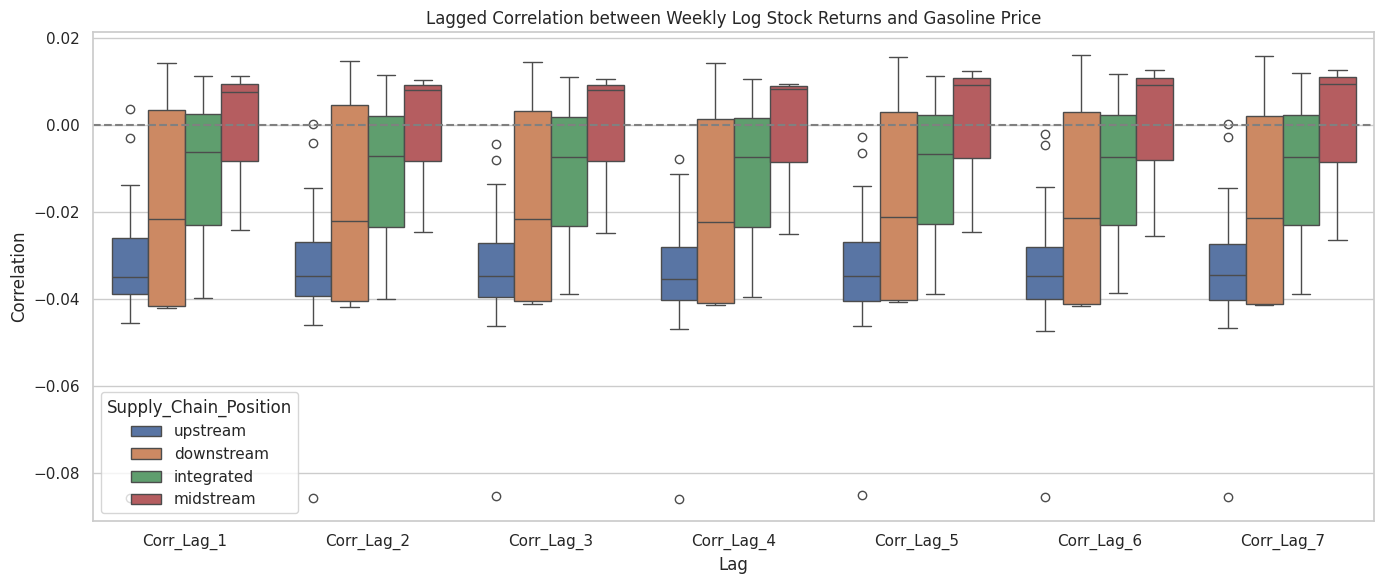

In [ ]:
## TODO: both with same measurement

for lag in range(1, 6):
    gas_us[f'US_Gasoline_Price_Lag_{lag}'] = gas_us['US_Gasoline_Price'].shift(lag)

merged_lagged_list = []

for ticker, group in weekly_stock_metrics.groupby('Ticker_Symbol'):
    stock_min_date = group['Date'].min()
    gas_lagged_sub = gas_us[gas_us['Date'] >= stock_min_date]

    merged = pd.merge(group, gas_lagged_sub, on='Date', how='inner')
    merged_lagged_list.append(merged)

merged_lagged = pd.concat(merged_lagged_list, ignore_index=True)

lagged_corr_results = []

for ticker, group in merged_lagged.groupby('Ticker_Symbol'):
    position = group['Supply_Chain_Position'].iloc[0]
    result = {'Ticker_Symbol': ticker, 'Supply_Chain_Position': position}

    for lag in range(1, 8):
        col_name = f'US_Gasoline_Price_Lag_{lag}'
        corr = group['Weekly_Avg_Daily_Log_Return'].corr(group[col_name])
        result[f'Corr_Lag_{lag}'] = corr

    lagged_corr_results.append(result)

lagged_corr_df = pd.DataFrame(lagged_corr_results)
display(lagged_corr_df.head())

melted = lagged_corr_df.melt(
    id_vars=['Ticker_Symbol', 'Supply_Chain_Position'],
    value_vars=[f'Corr_Lag_{i}' for i in range(1, 8)],
    var_name='Lag',
    value_name='Correlation'
)

plt.figure(figsize=(14, 6))
sns.boxplot(data=melted, x='Lag', y='Correlation', hue='Supply_Chain_Position')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Lagged Correlation between Weekly Log Stock Returns and Gasoline Price')
plt.tight_layout()
plt.show()

📊 **Conclusion on Lagged Correlation (Volatility vs. Gasoline Price)**

1. **Upstream companies** (e.g., exploration and production):

   * Show a **positive and relatively stable correlation** with gasoline price across all lags (Lag 1 to Lag 7).
   * This suggests that when gasoline prices increase, upstream company volatility tends to rise **in the following weeks** — likely due to increased speculation or pricing pressure upstream.

2. **Integrated companies**:

   * Also maintain a **consistently positive** correlation, slightly below upstream.
   * Their diversified operations may **buffer** volatility, but they still react positively to changes in gasoline prices.

3. **Downstream companies** (e.g., refining, distribution):

   * Show **high variability** and a wide range of correlation values (from negative to moderately positive).
   * This indicates that the response of downstream stock volatility to gasoline prices is **less predictable** and possibly influenced by regional or operational factors.

4. **Midstream companies** (e.g., transportation, pipelines):

   * Display **consistently negative or near-zero correlations**.
   * This is expected, as midstream operations are often **regulated or contract-based**, making them less sensitive to commodity price swings.

---

### 💡 **Insights and Suggestions**

* The **upstream and integrated sectors** are most **sensitive to gasoline price movements**, at least in terms of volatility. This aligns with intuition, as their revenue is directly tied to raw energy prices.
* The **downstream and midstream sectors** are either **less exposed** or **buffered**, especially midstream.
* Compared to returns, previous plots show that stock volatility has a higher correlation with gasoline prices. This may suggest that gas price shocks affect uncertainty more than returns directly.

In [ ]:
## TODO: 把股票用每天的算
## weekly and daily.

In [ ]:
## TODO: rolling correlation, segment by Market Regime or Time Period
## Correlation may spike in periods of high oil price volatility, e.g., 2008, 2014, 2020.

In [ ]:
## TODO: Volume-Weighted Metrics


In [ ]:
## TODO: Granger causality

In [ ]:
## TODO: cluster stocks by volatility

Add control variables: Include macro indicators like interest rate, inflation, or crude oil prices as mediating factors.

In [ ]:
# Crude Oil
crude = pd.read_csv('DCOILWTICO.csv', parse_dates=['observation_date'])
crude.rename(columns={'observation_date': 'Date', 'DCOILWTICO': 'Crude_Oil_Price'}, inplace=True)
crude = crude.dropna()

# Inflation
inflation = pd.read_csv('T10YIE.csv', parse_dates=['observation_date'])
inflation.rename(columns={'observation_date': 'Date', 'T10YIE': 'Inflation_Rate'}, inplace=True)
inflation = inflation.dropna()

In [ ]:
stocks['Supply_Chain_Position'] = stocks['Ticker_Symbol'].map(supply_chain_map)
upstream_stocks = stocks[stocks['Supply_Chain_Position'] == 'upstream'].copy()

# Daily return (%)
upstream_stocks['Daily_Return'] = upstream_stocks.groupby('Ticker_Symbol')['Close'].pct_change()

In [ ]:
merged = upstream_stocks.merge(crude, on='Date', how='left')
merged = merged.merge(inflation, on='Date', how='left')

# Filter na
merged.dropna(subset=['Daily_Return', 'Crude_Oil_Price', 'Inflation_Rate'], inplace=True)

In [ ]:
import statsmodels.api as sm

# base on the stock to model
for ticker, group in merged.groupby('Ticker_Symbol'):
    X = group[['Crude_Oil_Price', 'Inflation_Rate']]
    y = group['Daily_Return']
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    print(f'\n{ticker} Regression Summary:')
    print(model.summary())


BKR Regression Summary:
                            OLS Regression Results                            
Dep. Variable:           Daily_Return   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.234
Date:                Fri, 16 May 2025   Prob (F-statistic):              0.292
Time:                        15:17:39   Log-Likelihood:                 3592.6
No. Observations:                1631   AIC:                            -7179.
Df Residuals:                    1628   BIC:                            -7163.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            

In [ ]:
import statsmodels.api as sm

upstream_stocks = stocks[stocks['Supply_Chain_Position'] == 'upstream'].copy()

upstream_stocks['Daily_Return'] = upstream_stocks.groupby('Ticker_Symbol')['Close'].pct_change()

# gasoline price（shift to Friday）
merged = upstream_stocks.merge(gas_us, on='Date', how='left')
merged = merged.merge(crude, on='Date', how='left')
merged = merged.merge(inflation, on='Date', how='left')

merged.dropna(subset=['Daily_Return', 'US_Gasoline_Price', 'Crude_Oil_Price', 'Inflation_Rate'], inplace=True)

# Perform regression for each stock
for ticker, group in merged.groupby('Ticker_Symbol'):
    X = group[['US_Gasoline_Price', 'Crude_Oil_Price', 'Inflation_Rate']]
    y = group['Daily_Return']
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    print(f'\n=== Regression for {ticker} ===')
    print(model.summary())



=== Regression for BKR ===
                            OLS Regression Results                            
Dep. Variable:           Daily_Return   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     8.294
Date:                Fri, 16 May 2025   Prob (F-statistic):           1.69e-05
Time:                        15:19:37   Log-Likelihood:                 10436.
No. Observations:                4522   AIC:                        -2.086e+04
Df Residuals:                    4518   BIC:                        -2.084e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const     

In [ ]:
# Crude Oil
crude = pd.read_csv('DCOILWTICO.csv', parse_dates=['observation_date'])
# crude.rename(columns={'observation_date': 'Date', 'DCOILWTICO': 'Crude_Oil_Price'}, inplace=True) # This renaming is commented out, which is correct later
crude = crude.dropna()

# Inflation
inflation = pd.read_csv('T10YIE.csv', parse_dates=['observation_date'])
# inflation.rename(columns={'observation_date': 'Date', 'T10YIE': 'Inflation_Rate'}, inplace=True) # This renaming is commented out, which is correct later
inflation = inflation.dropna()

# Calculate weekly return - This was calculated on the stocks DataFrame but not used in the merged df later.
# stocks['Weekly_Return'] = stocks.groupby('Ticker_Symbol')['Close'].transform(lambda x: x.pct_change(periods=5))

# Merge weekly gasoline price (already shifted to Friday earlier in the notebook)
# The gas_us DataFrame already exists from previous cells and has the 'Date' and 'US_Gasoline_Price' columns correctly named.
# gas_us = gas_prices[gas_prices['Geography'] == 'US'][['Date', 'Price']].copy()
# gas_us['Date'] = pd.to_datetime(gas_us['Date']) + pd.Timedelta(days=4)
# gas_us.rename(columns={'Price': 'US_Gasoline_Price'}, inplace=True)


# Merge weekly crude oil and inflation
crude['observation_date'] = pd.to_datetime(crude['observation_date'])
crude_weekly = crude.set_index('observation_date').resample('W-FRI').last().reset_index()
crude_weekly.rename(columns={'observation_date': 'Date', 'DCOILWTICO': 'Crude_Oil_Price'}, inplace=True) # Add renaming here

inflation['observation_date'] = pd.to_datetime(inflation['observation_date'])
inflation_weekly = inflation.set_index('observation_date').resample('W-FRI').last().reset_index()
inflation_weekly.rename(columns={'observation_date': 'Date', 'T10YIE': 'Inflation_Rate'}, inplace=True) # Add renaming here


# Start with weekly_stock_metrics as the base, which already has 'Weekly_Avg_Pct_Return'
df = weekly_stock_metrics.copy()
display(df.head())
display(df.tail())

# Merge the weekly dataframes
df = df.merge(gas_us[['Date', 'US_Gasoline_Price']], on='Date', how='left') # Only merge necessary columns
df = df.merge(crude_weekly[['Date', 'Crude_Oil_Price']], on='Date', how='left') # Only merge necessary columns
df = df.merge(inflation_weekly[['Date', 'Inflation_Rate']], on='Date', how='left') # Only merge necessary columns


display(df.head())
display(df.tail())
# Remove the incorrect renaming step as the column is already 'Weekly_Avg_Pct_Return'
# df.rename(columns={
#     'DCOILWTICO': 'Crude_Oil_Price',
#     'T10YIE': 'Inflation_Rate',
#     'Weekly_Pct_Return': 'Weekly_Return' # This was incorrect
# }, inplace=True)


# lagged features
df['Gasoline_Lag1'] = df.groupby('Ticker_Symbol')['US_Gasoline_Price'].shift(1)
df['Crude_Lag1'] = df.groupby('Ticker_Symbol')['Crude_Oil_Price'].shift(1)
df['Inflation_Lag1'] = df.groupby('Ticker_Symbol')['Inflation_Rate'].shift(1)


df = df[df['Supply_Chain_Position'] == 'upstream'].copy() # Use .copy() to avoid SettingWithCopyWarning


display(df.head())
display(df.tail())
# Drop rows based on the correct column name 'Weekly_Avg_Pct_Return'
df = df.dropna(subset=['Weekly_Avg_Pct_Return', 'Gasoline_Lag1', 'Crude_Lag1', 'Inflation_Lag1'])

display(df.head())
display(df.tail())

Date  Weekly_Avg_Daily_Log_Return  Weekly_Avg_Pct_Return  \
0 2017-07-07                     0.008781               0.008937   
1 2017-07-14                    -0.002976              -0.002903   
2 2017-07-21                    -0.018090              -0.017774   
3 2017-07-28                     0.016747               0.016936   
4 2017-08-04                    -0.010344              -0.010224   

   Weekly_Avg_Volatility Ticker_Symbol Supply_Chain_Position  
0               2.536667           BKR              upstream  
1               0.909000           BKR              upstream  
2               1.198000           BKR              upstream  
3               1.332860           BKR              upstream  
4               0.719000           BKR              upstream

Date  Weekly_Avg_Daily_Log_Return  Weekly_Avg_Pct_Return  \
29992 2023-12-29                    -0.004780              -0.004750   
29993 2024-01-05                     0.006540               0.006629   
29994 2024-01-12                    -0.005292              -0.005222   
29995 2024-01-19                    -0.007619              -0.007546   
29996 2024-01-26                     0.013013               0.013145   

       Weekly_Avg_Volatility Ticker_Symbol Supply_Chain_Position  
29992               1.145000           XOM            integrated  
29993               2.000925           XOM            integrated  
29994               1.659940           XOM            integrated  
29995               1.433900           XOM            integrated  
29996               1.892500           XOM            integrated

Date  Weekly_Avg_Daily_Log_Return  Weekly_Avg_Pct_Return  \
0 2017-07-07                     0.008781               0.008937   
1 2017-07-14                    -0.002976              -0.002903   
2 2017-07-21                    -0.018090              -0.017774   
3 2017-07-28                     0.016747               0.016936   
4 2017-08-04                    -0.010344              -0.010224   

   Weekly_Avg_Volatility Ticker_Symbol Supply_Chain_Position  \
0               2.536667           BKR              upstream   
1               0.909000           BKR              upstream   
2               1.198000           BKR              upstream   
3               1.332860           BKR              upstream   
4               0.719000           BKR              upstream   

   US_Gasoline_Price  Crude_Oil_Price  Inflation_Rate  
0                NaN            44.25            1.73  
1                NaN            46.53            1.76  
2                NaN            45.78            1.76  
3                NaN            49.72            1.83  
4                NaN            49.57            1.80

Date  Weekly_Avg_Daily_Log_Return  Weekly_Avg_Pct_Return  \
25698 2023-12-29                    -0.004780              -0.004750   
25699 2024-01-05                     0.006540               0.006629   
25700 2024-01-12                    -0.005292              -0.005222   
25701 2024-01-19                    -0.007619              -0.007546   
25702 2024-01-26                     0.013013               0.013145   

       Weekly_Avg_Volatility Ticker_Symbol Supply_Chain_Position  \
25698               1.145000           XOM            integrated   
25699               2.000925           XOM            integrated   
25700               1.659940           XOM            integrated   
25701               1.433900           XOM            integrated   
25702               1.892500           XOM            integrated   

       US_Gasoline_Price  Crude_Oil_Price  Inflation_Rate  
25698                NaN            71.89            2.16  
25699                NaN            74.00            2.22  
25700                NaN            72.94            2.27  
25701                NaN            73.69            2.34  
25702                NaN            78.45            2.30

Date  Weekly_Avg_Daily_Log_Return  Weekly_Avg_Pct_Return  \
0 2017-07-07                     0.008781               0.008937   
1 2017-07-14                    -0.002976              -0.002903   
2 2017-07-21                    -0.018090              -0.017774   
3 2017-07-28                     0.016747               0.016936   
4 2017-08-04                    -0.010344              -0.010224   

   Weekly_Avg_Volatility Ticker_Symbol Supply_Chain_Position  \
0               2.536667           BKR              upstream   
1               0.909000           BKR              upstream   
2               1.198000           BKR              upstream   
3               1.332860           BKR              upstream   
4               0.719000           BKR              upstream   

   US_Gasoline_Price  Crude_Oil_Price  Inflation_Rate  Gasoline_Lag1  \
0                NaN            44.25            1.73            NaN   
1                NaN            46.53            1.76            NaN   
2                NaN            45.78            1.76            NaN   
3                NaN            49.72            1.83            NaN   
4                NaN            49.57            1.80            NaN   

   Crude_Lag1  Inflation_Lag1  
0         NaN             NaN  
1       44.25            1.73  
2       46.53            1.76  
3       45.78            1.76  
4       49.72            1.83

Date  Weekly_Avg_Daily_Log_Return  Weekly_Avg_Pct_Return  \
21903 2023-12-29                    -0.004947              -0.004883   
21904 2024-01-05                    -0.000866              -0.000802   
21905 2024-01-12                    -0.007505              -0.007229   
21906 2024-01-19                    -0.001556              -0.001323   
21907 2024-01-26                     0.013861               0.014024   

       Weekly_Avg_Volatility Ticker_Symbol Supply_Chain_Position  \
21903               0.868725           SLB              upstream   
21904               1.249225           SLB              upstream   
21905               1.043000           SLB              upstream   
21906               1.447500           SLB              upstream   
21907               1.397500           SLB              upstream   

       US_Gasoline_Price  Crude_Oil_Price  Inflation_Rate  Gasoline_Lag1  \
21903                NaN            71.89            2.16            NaN   
21904                NaN            74.00            2.22            NaN   
21905                NaN            72.94            2.27            NaN   
21906                NaN            73.69            2.34            NaN   
21907                NaN            78.45            2.30            NaN   

       Crude_Lag1  Inflation_Lag1  
21903       73.29            2.19  
21904       71.89            2.16  
21905       74.00            2.22  
21906       72.94            2.27  
21907       73.69            2.34

Empty DataFrame
Columns: [Date, Weekly_Avg_Daily_Log_Return, Weekly_Avg_Pct_Return, Weekly_Avg_Volatility, Ticker_Symbol, Supply_Chain_Position, US_Gasoline_Price, Crude_Oil_Price, Inflation_Rate, Gasoline_Lag1, Crude_Lag1, Inflation_Lag1]
Index: []

Empty DataFrame
Columns: [Date, Weekly_Avg_Daily_Log_Return, Weekly_Avg_Pct_Return, Weekly_Avg_Volatility, Ticker_Symbol, Supply_Chain_Position, US_Gasoline_Price, Crude_Oil_Price, Inflation_Rate, Gasoline_Lag1, Crude_Lag1, Inflation_Lag1]
Index: []

In [ ]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
# Check if the DataFrame is empty after filtering
if df.empty:
    print("DataFrame 'df' is empty after filtering for 'upstream' stocks. Check previous steps and data sources.")
else:
    # Calculate lagged features AFTER merging
    # Use a lambda function within transform for more robust shifting within groups
    df['Gasoline_Lag1'] = df.groupby('Ticker_Symbol')['US_Gasoline_Price'].transform(lambda x: x.shift(1))
    df['Crude_Lag1'] = df.groupby('Ticker_Symbol')['Crude_Oil_Price'].transform(lambda x: x.shift(1))
    df['Inflation_Lag1'] = df.groupby('Ticker_Symbol')['Inflation_Rate'].transform(lambda x: x.shift(1))

    # Drop rows with any missing values in the columns required for regression
    # Ensure the correct column names are used
    cols_to_check = ['Weekly_Avg_Pct_Return', 'Gasoline_Lag1', 'Crude_Lag1', 'Inflation_Lag1']
    initial_rows = len(df)
    df.dropna(subset=cols_to_check, inplace=True)
    rows_after_dropna = len(df)
    print(f"Dropped {initial_rows - rows_after_dropna} rows due to missing values in required columns.")


    # Check if the DataFrame is still empty after dropping NaNs
    if df.empty:
        print("DataFrame 'df' is empty after dropping rows with missing values. Cannot run regression.")
    else:
        # Setting Panel index：Ticker_Symbol & Date
        panel_df = df.set_index(['Ticker_Symbol', 'Date'])

        # Perform regression
        # Ensure the column names in the formula match the DataFrame
        try:
            model = PanelOLS.from_formula(
                'Weekly_Avg_Pct_Return ~ 1 + Gasoline_Lag1 + Crude_Lag1 + Inflation_Lag1 + EntityEffects', # Added 1 for constant explicitly
                data=panel_df
            )

            results = model.fit()
            print(results.summary)

        except ValueError as e:
             print(f"An error occurred during model fitting: {e}")
             print("Check for potential multicollinearity issues or entities with insufficient data variation after transformations.")
             # Optional: Add check_rank=False here if you understand the implications
             # model = PanelOLS.from_formula(
             #     'Weekly_Avg_Pct_Return ~ 1 + Gasoline_Lag1 + Crude_Lag1 + Inflation_Lag1 + EntityEffects',
             #     data=panel_df,
             #     check_rank=False # Use with caution!
             # )
             # results = model.fit()
             # print(results.summary)

DataFrame 'df' is empty after filtering for 'upstream' stocks. Check previous steps and data sources.
